# House Prediction

In [55]:
#importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the file
df=pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [5]:
df.shape

(1168, 81)

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df.info

<bound method DataFrame.info of        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ...

In [17]:
df.isnull().sum().sort_values().tail(20)

Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
BsmtQual          30
BsmtCond          30
BsmtFinType1      30
BsmtFinType2      31
BsmtExposure      31
GarageQual        64
GarageFinish      64
GarageYrBlt       64
GarageCond        64
GarageType        64
LotFrontage      214
FireplaceQu      551
Fence            931
Alley           1091
MiscFeature     1124
PoolQC          1161
dtype: int64

last 20 columns has missing values

In [18]:
#Checking the value counts of categorical data
for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('\n')

MSZoning : ['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street : ['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley : [nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape : ['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour : ['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities : ['AllPub']
AllPub    1168
Name: Utilities, dtype: int64


LotConfig : ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope : ['Gtl' 'Mod' 'Sev']
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood : ['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDal

In [4]:
#Dropping other unnecessary columns in the dataset
df.drop('Id',axis=1,inplace=True) 
df.drop('PoolArea',axis=1,inplace=True) 
df.drop('PoolQC',axis=1,inplace=True) 
df.drop(['Utilities'],axis=1,inplace=True)

In [3]:
#handling missing data

b=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for i in b:
    df[i].fillna('No_Basement',inplace=True)
    print(df[i].value_counts())
    
df['MiscFeature'].fillna('None',inplace=True)
print(df['MiscFeature'].value_counts())

df['Alley'].fillna('No_alley_access',inplace=True)
print(df['Alley'].value_counts())

df['Fence'].fillna('No_Fence',inplace=True)
print(df['Fence'].value_counts())

df['FireplaceQu'].fillna('No_Fireplace',inplace=True)
print(df['FireplaceQu'].value_counts())

df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)

g=['GarageType','GarageFinish','GarageQual','GarageCond']
for i in g:
    df[i].fillna('No_Garage',inplace=True)
    print(df[i].value_counts())
    
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(df["YearBuilt"])
print(df['GarageYrBlt'].value_counts())    
    
df['MasVnrArea'].fillna(0,inplace=True)
print(df['MasVnrArea'].value_counts())

df['MasVnrType'] = df['MasVnrType'].fillna('None')

TA             517
Gd             498
Ex              94
No_Basement     30
Fa              29
Name: BsmtQual, dtype: int64
TA             1041
Gd               56
Fa               39
No_Basement      30
Po                2
Name: BsmtCond, dtype: int64
No             756
Av             180
Gd             108
Mn              93
No_Basement     31
Name: BsmtExposure, dtype: int64
Unf            345
GLQ            330
ALQ            174
BLQ            121
Rec            109
LwQ             59
No_Basement     30
Name: BsmtFinType1, dtype: int64
Unf            1002
Rec              43
LwQ              40
No_Basement      31
BLQ              24
ALQ              16
GLQ              12
Name: BsmtFinType2, dtype: int64
None    1124
Shed      40
Gar2       2
TenC       1
Othr       1
Name: MiscFeature, dtype: int64
No_alley_access    1091
Grvl                 41
Pave                 36
Name: Alley, dtype: int64
No_Fence    931
MnPrv       129
GdPrv        51
GdWo         47
MnWw         10
Name:

In [22]:
#Checking again if missing values present in train dateset
df.isnull().values.any()

False

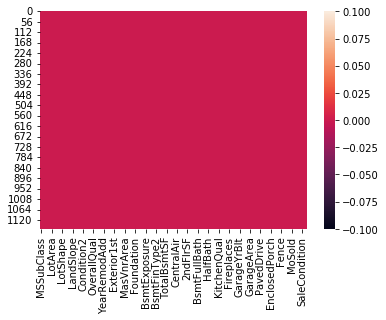

In [23]:
#Data visualization
#checking missing values
sns.heatmap(df.isnull())

no missing values 

In [6]:
#Taking the categorical data 
categorical=[x for x in df.columns if df[x].dtype==object]

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


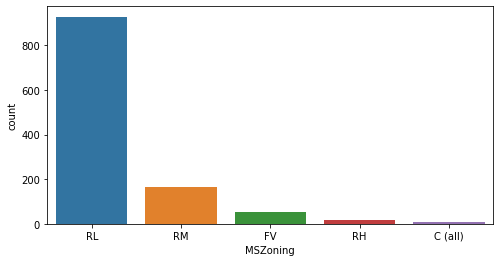

Pave    1164
Grvl       4
Name: Street, dtype: int64


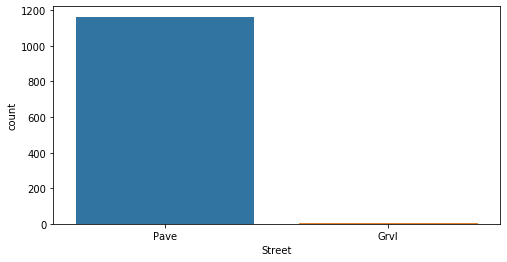

No_alley_access    1091
Grvl                 41
Pave                 36
Name: Alley, dtype: int64


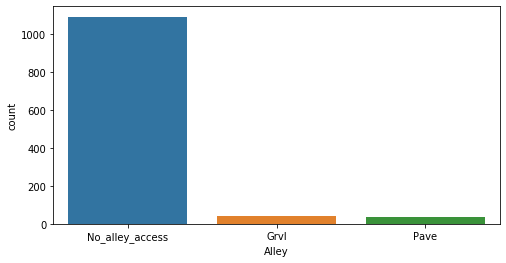

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


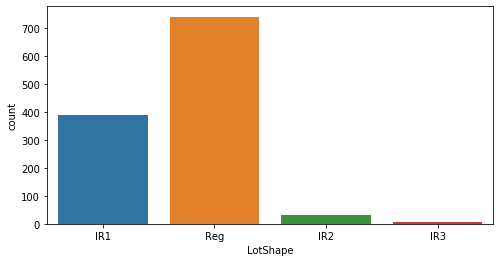

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


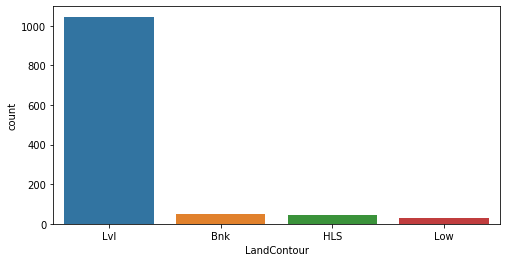

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


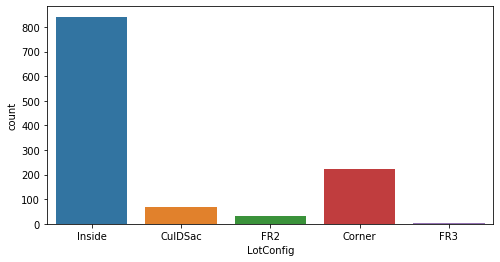

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


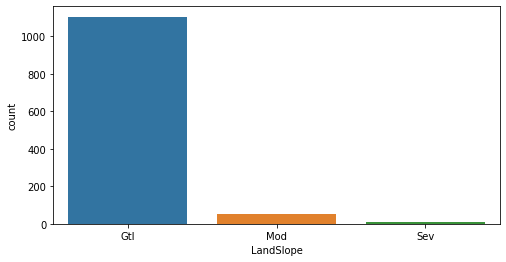

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


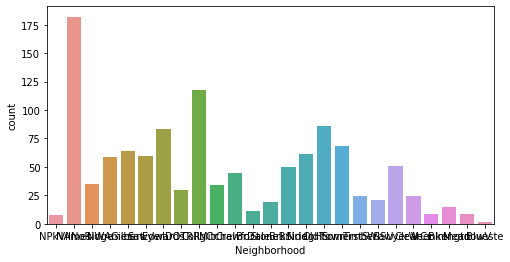

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


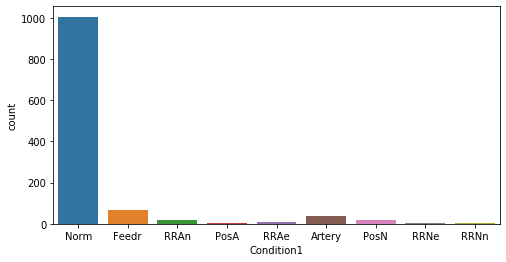

Norm      1154
Feedr        6
PosN         2
Artery       2
RRNn         1
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64


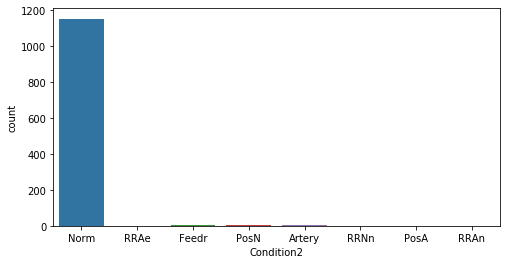

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


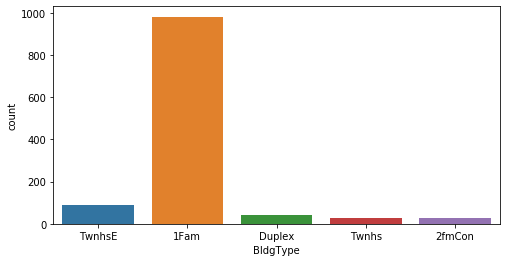

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


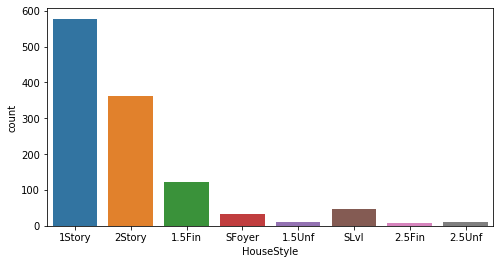

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


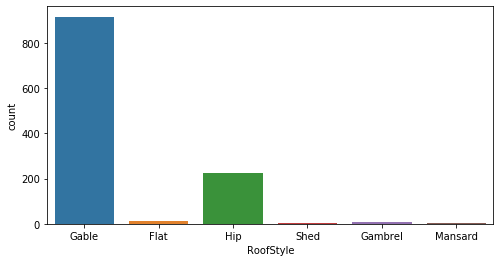

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Membran       1
Roll          1
ClyTile       1
Metal         1
Name: RoofMatl, dtype: int64


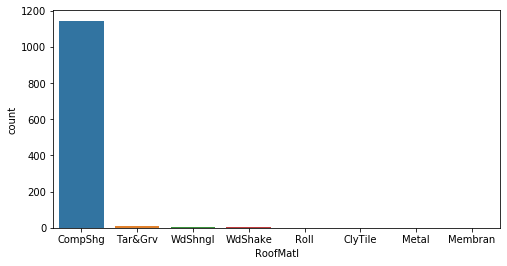

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
AsbShng     19
WdShing     19
Stone        2
BrkComm      1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64


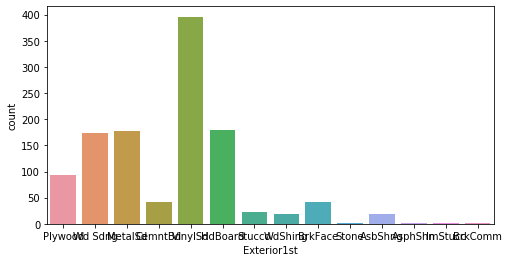

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


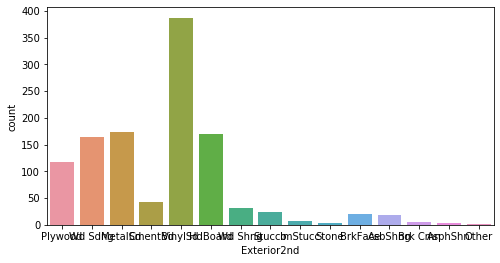

None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


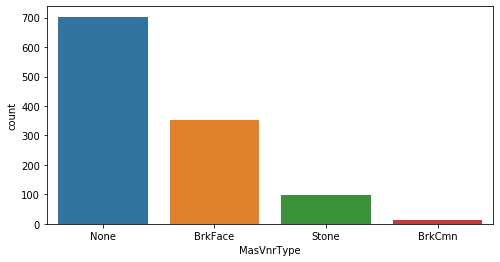

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


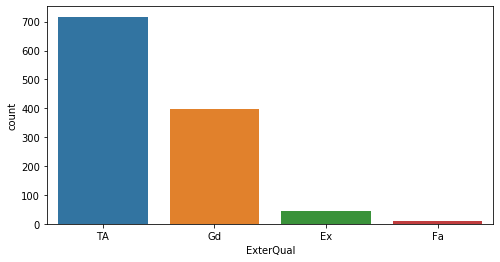

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


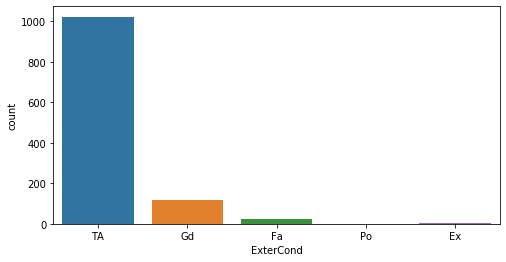

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


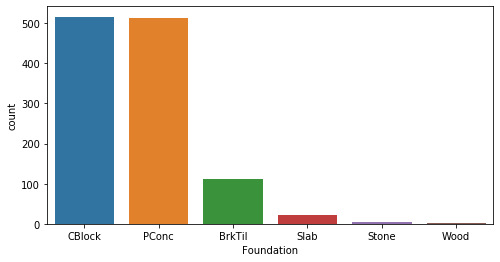

TA             517
Gd             498
Ex              94
No_Basement     30
Fa              29
Name: BsmtQual, dtype: int64


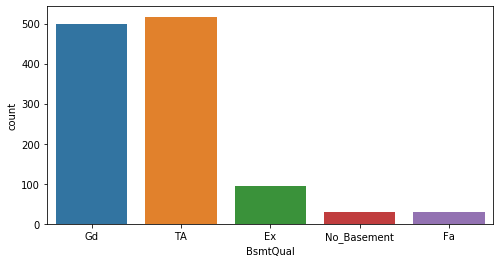

TA             1041
Gd               56
Fa               39
No_Basement      30
Po                2
Name: BsmtCond, dtype: int64


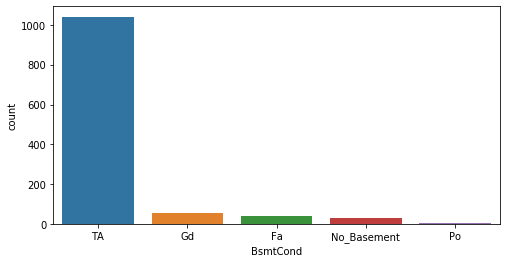

No             756
Av             180
Gd             108
Mn              93
No_Basement     31
Name: BsmtExposure, dtype: int64


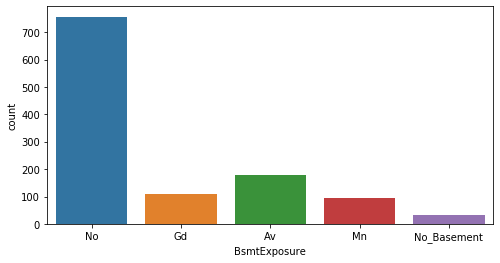

Unf            345
GLQ            330
ALQ            174
BLQ            121
Rec            109
LwQ             59
No_Basement     30
Name: BsmtFinType1, dtype: int64


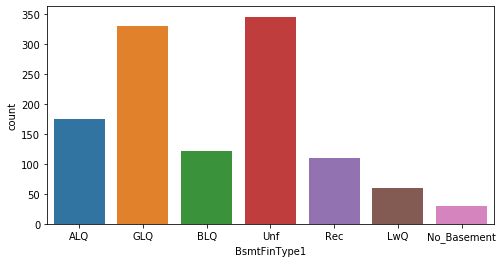

Unf            1002
Rec              43
LwQ              40
No_Basement      31
BLQ              24
ALQ              16
GLQ              12
Name: BsmtFinType2, dtype: int64


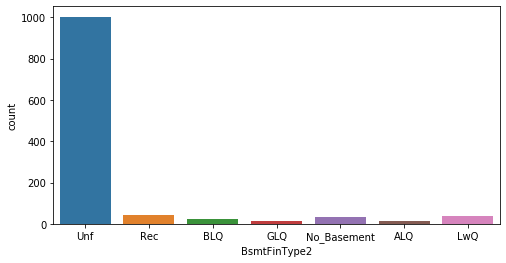

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


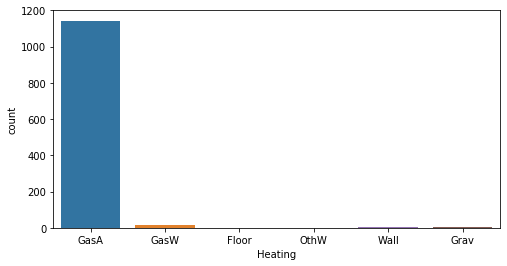

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


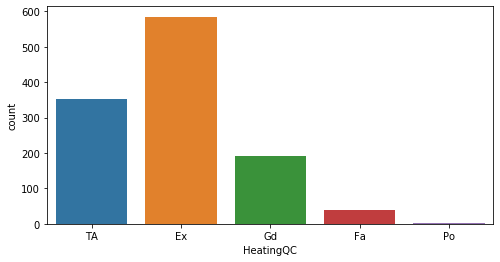

Y    1090
N      78
Name: CentralAir, dtype: int64


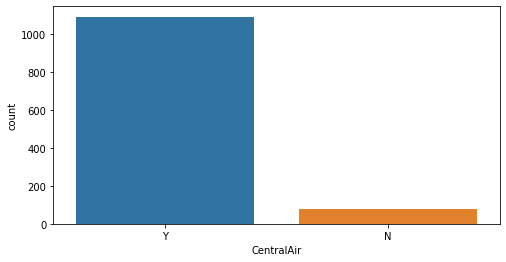

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


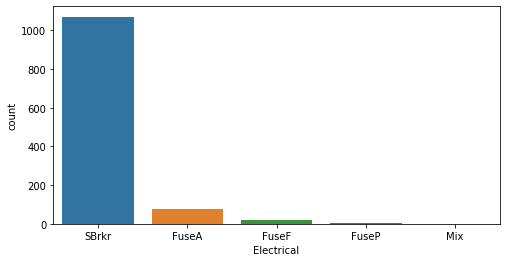

TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


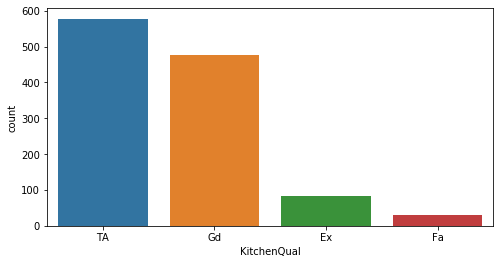

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


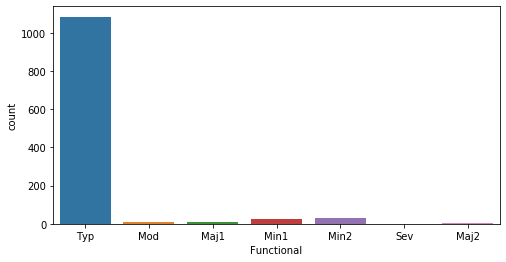

No_Fireplace    551
Gd              301
TA              252
Fa               25
Ex               21
Po               18
Name: FireplaceQu, dtype: int64


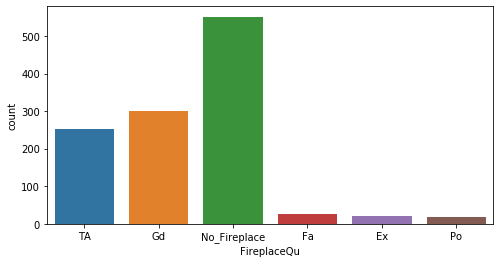

Attchd       691
Detchd       314
BuiltIn       70
No_Garage     64
Basment       16
CarPort        8
2Types         5
Name: GarageType, dtype: int64


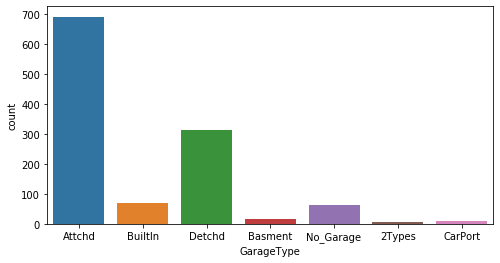

Unf          487
RFn          339
Fin          278
No_Garage     64
Name: GarageFinish, dtype: int64


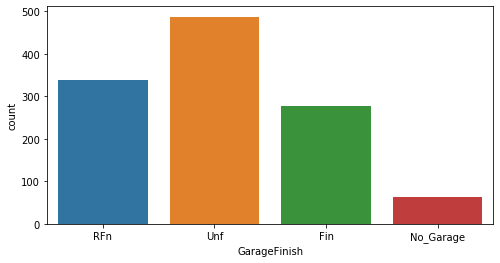

TA           1050
No_Garage      64
Fa             39
Gd             11
Ex              2
Po              2
Name: GarageQual, dtype: int64


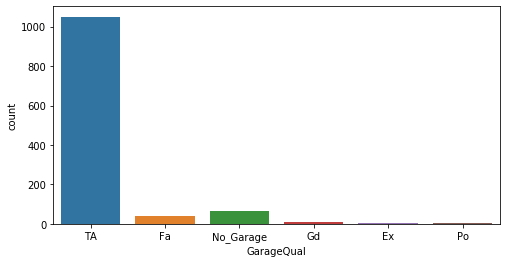

TA           1061
No_Garage      64
Fa             28
Gd              8
Po              6
Ex              1
Name: GarageCond, dtype: int64


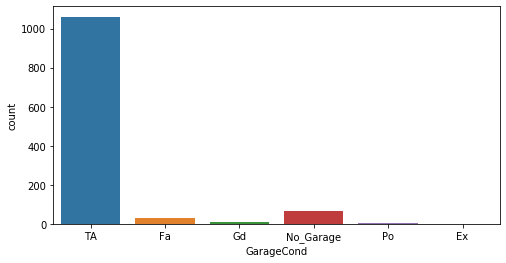

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


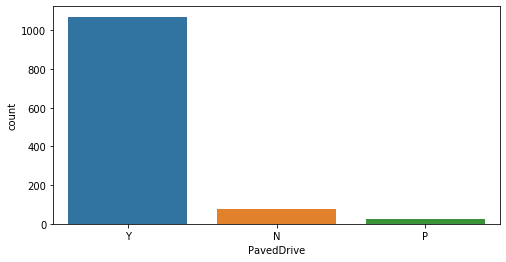

No_Fence    931
MnPrv       129
GdPrv        51
GdWo         47
MnWw         10
Name: Fence, dtype: int64


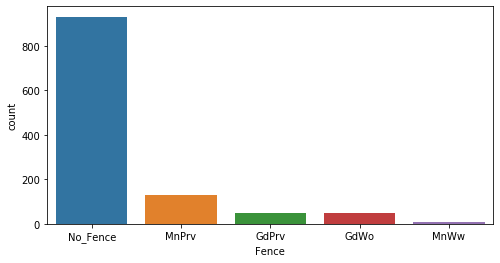

None    1124
Shed      40
Gar2       2
TenC       1
Othr       1
Name: MiscFeature, dtype: int64


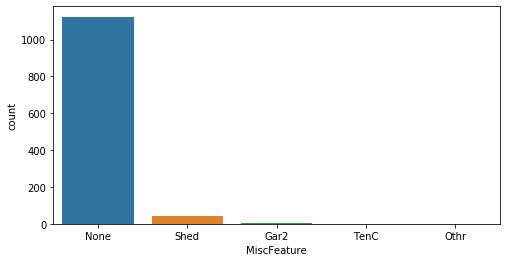

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
CWD        3
Oth        3
Con        2
Name: SaleType, dtype: int64


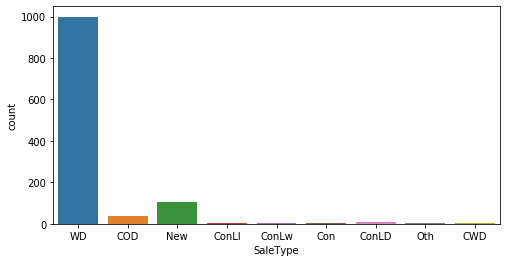

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


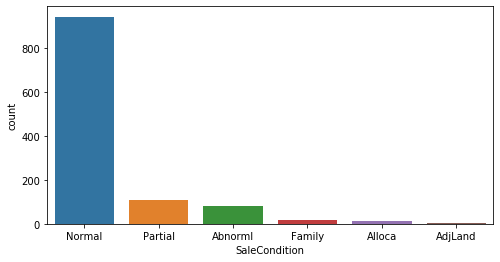

In [30]:
#Plotting countplot for each categorical data
for i in categorical:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=df[i])
    print(df[i].value_counts())
    plt.show()

# Observations:

1. By looking at countplot of MSZoning ,which Identifies the general zoning classification of the sale,we find that 79 % of houses were sold in Low density resedential Areas.
2. For street ,which states:Type of road access to property,we observe that almost 100% of house which were sold had access to paved roads so we can consider that no houses were purchased which had gravel road access.
3. For Alley,93% of the purchased house do not have access to alley.Only 4% have gravel & 3% have paved alley.
4. LotShape : 63% of the sold property was of Regular shape followed by slightly irregular type (33%).It means Australian gives priority to regular shaped houses.
5. LandContour :90% of sold houses were neary flat level.
6. LotConfig : 72% of purchased houses had Inside lot of the property.
7. LandSlope :Around 95% of the sold property had gentle slope
8. Neighborhood: Physical locations within Ames city limits-:highest 16% of purhcased houses has neighbourhood of NWAmes(Northwest Ames) followed by CollgCr(College Creek) and least houses were purchased in neighbour hood of Bluestem
9. Condition1: Proximity to various conditions-:86% of purchased houses had normal proximity to various conditions1 and least 0.00 had RRne,RRNn proximity
10. Condition2: Proximity to various conditions (if more than one is present)-:99% of purchased houses had normal proximity to various conditions2
11. BldgType: Type of dwelling-:84% purchased houses were single family detached,followed by 8% 2FmCon(Two-family Conversion)
12. HouseStyle: Style of dwelling-:49% houses had 1story followed by 2story style (31%)
13. RoofStyle: Type of roof-:78% of houses have Gable roof style and 19% have Hip roof style
14. RoofMatl: Roof material-:98% houses have CompShg(Standard (Composite) Shingle) roof material
15. Exterior1st: Exterior covering on house-:34% houses have Vinylsiding covering on exteriors 15% have hard board and metal siding
16. Exterior2nd: Exterior covering on house (if more than one material)-:33% houses have VinylSd(Vinyl Siding) 15% have hard board and metal siding
17. MasVnrType: Masonry veneer type-:60% of houses have no masonry veneer type followed by BrkFace(Brick Face) (30%)
18. ExterQual: Evaluates the quality of the material on the exterior-:61% of the sold hoUse have TA(Average/Typical) quality material on exterior followed by Gd(Good) 34%
19. ExterCond: Evaluates the present condition of the material on the exterior-:88% houses are currently in TA(average) condition of exterior material
20. Foundation: Type of foundation-:44% houses have foundation CBlock(Cinder Block) & 44% have PConc(Poured Contrete)
21. BsmtQual: Evaluates the height of the basement-:44% of houses have TA(typical) (80-89 inches) basement height followed by Gd(Good) (90-99 inches)
22. BsmtCond: Evaluates the general condition of the basement-:89% of houses have TA(Typical - slight dampness allowed) basment
23. BsmtExposure: Refers to walkout or garden level walls-:64% of houses have No(No Exposure) followed by Av(Average Exposure ) 15%
24. BsmtFinType1: Rating of basement finished area-:(30%) have Unf(Unfinshed) basement area and 28% comes under GLQ(good living quarters)
25. Heating: Type of heating-:98% houses have GasA(Gas forced warm air furnace) heating type
26. HeatingQC: Heating quality and condition-:30% houses have average quality heating
27. CentralAir: Central air conditioning-:93% houses are central air
28. Electrical: Electrical system-:92% houses have SbrKr(Standard Circuit Breakers & Romex) type of electrical systems
29. KitchenQual: Kitchen quality-:49% houses have average (TA) kitchen quality
30. Functional: Home functionality (Assume typical unless deductions are warranted)-:92% houses have typical (TA) home functionality
31. FireplaceQu: Fireplace quality-:47% of the houses donot have fireplace,25% houses have Gd(Good - Masonry Fireplace in main level) FireplaceQuality
32. GarageType: Garage location-:57% houses have Attached garage type,while 29% have Detchd(Detached from home)
33. GarageFinish: Interior finish of the garage:42% of houses have unfinished garage while 29% have RFn(Rough Finished)
34. GarageQual: Garage quality-:90% of houses have average garage quality
35. GarageCond: Garage condition-:91% of houses have TA( average garage condition)
36. PavedDrive: Paved driveway-:92% of houses have Y( paved drive) way
37. Fence: Fence quality-:89% houses have NA(no fence).
38. MiscFeature: Miscellaneous feature-:96% houses have no miscellaneous features
39. SaleType: Type of sale-:85% houses have sale type WD(warranty deed -conventional)
40. SaleCondition:81% of houses are in normal sale condition

In [7]:
#Taking all continuous data
continuous=[x for x in df.columns if x not in categorical]

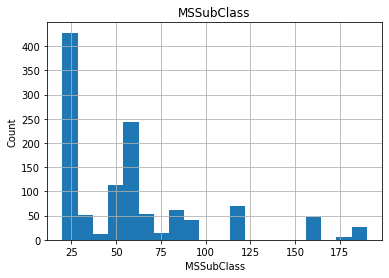

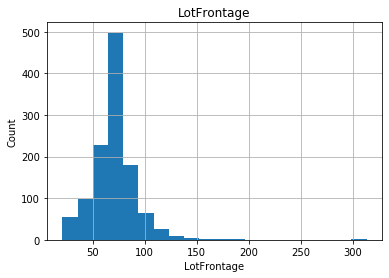

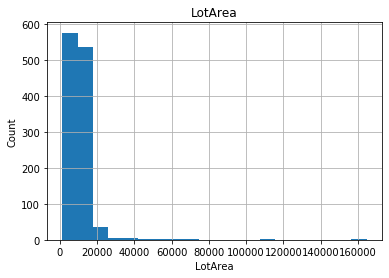

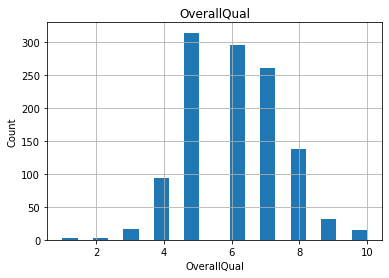

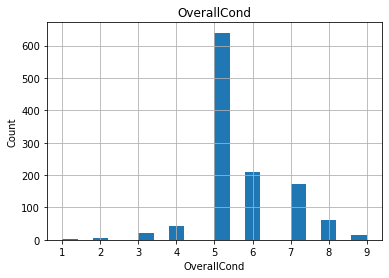

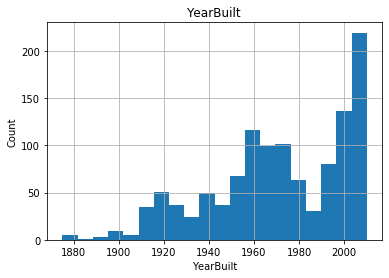

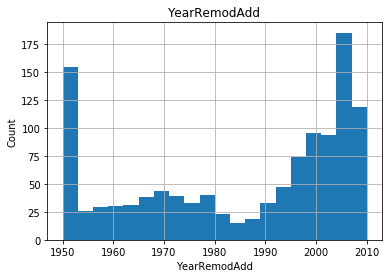

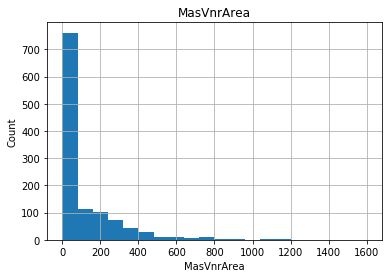

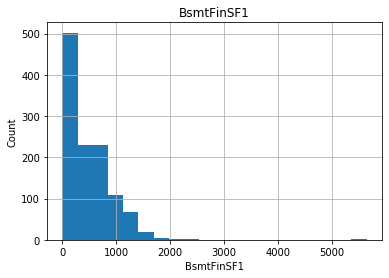

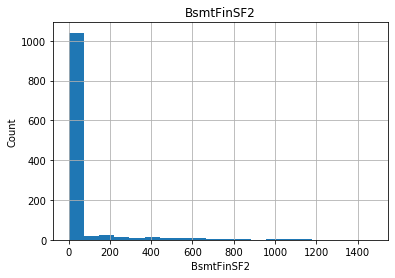

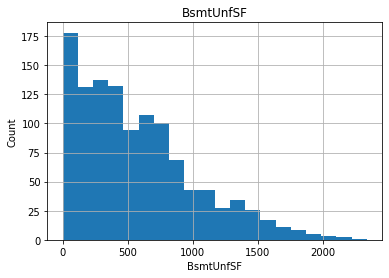

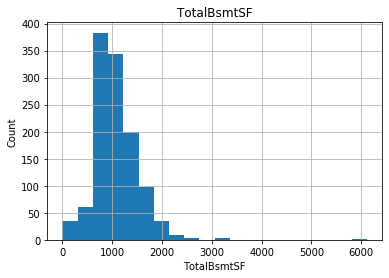

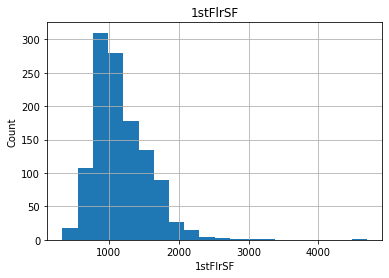

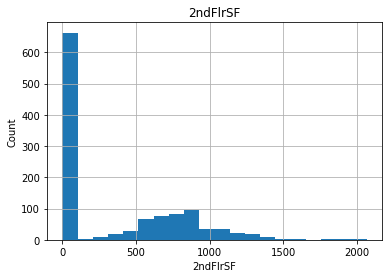

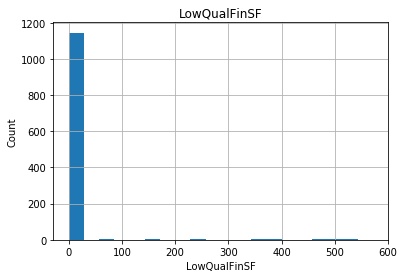

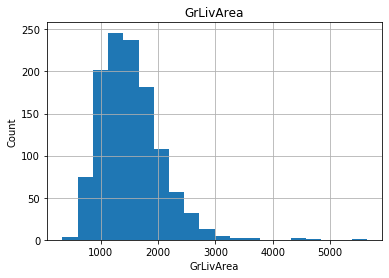

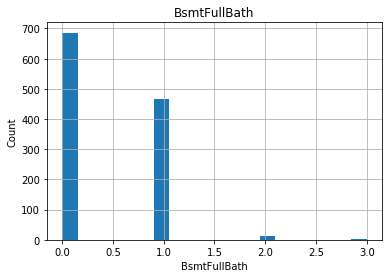

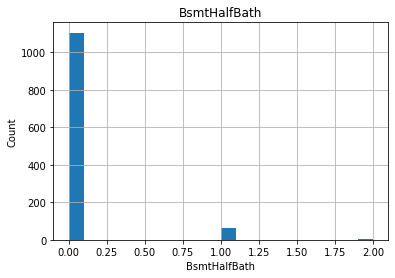

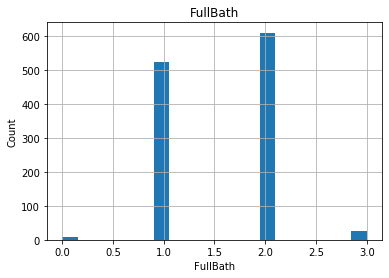

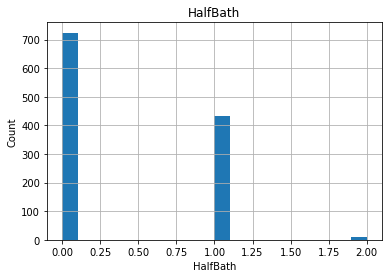

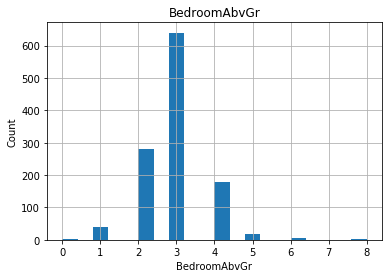

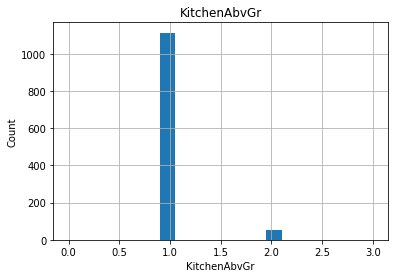

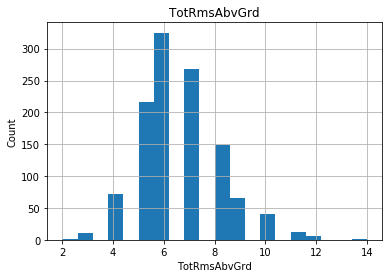

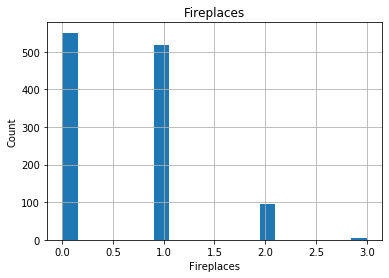

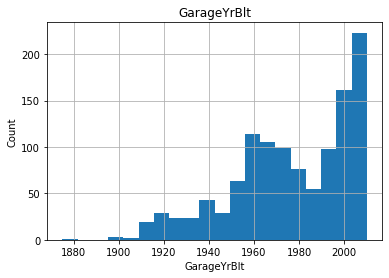

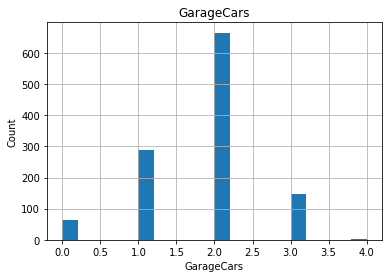

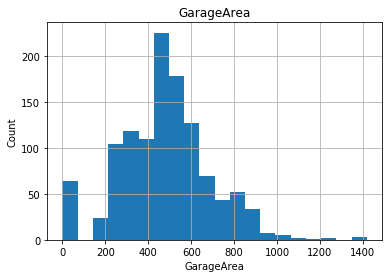

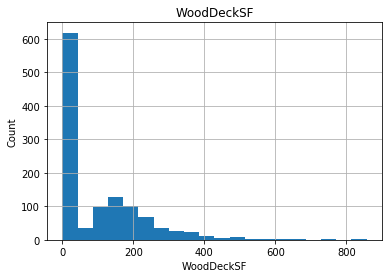

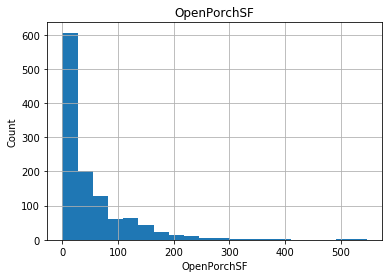

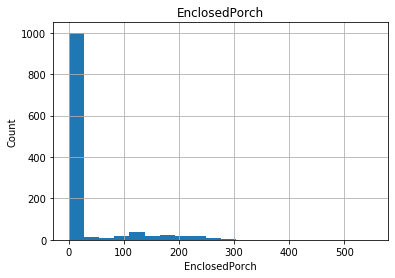

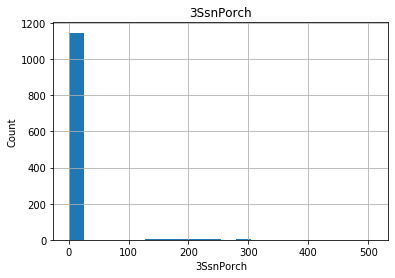

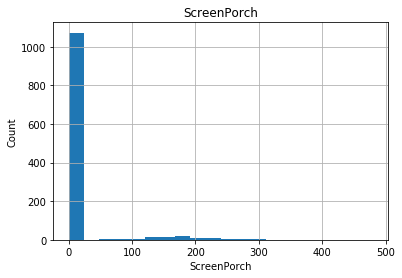

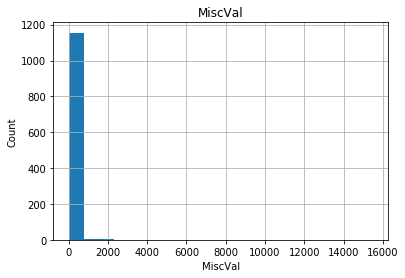

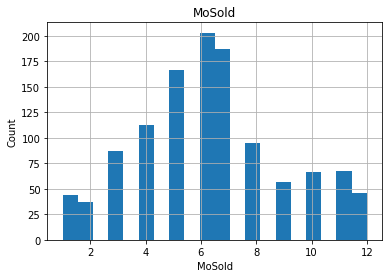

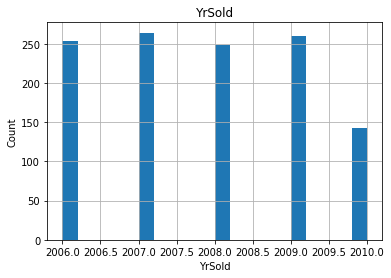

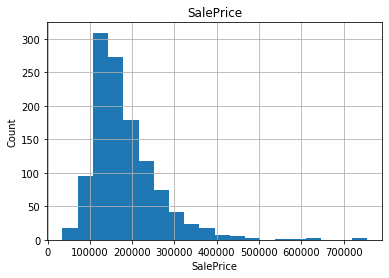

In [9]:
for i in continuous:
    data=df.copy()
    data[i].hist(bins=20)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

# Observation:

1. lotFrontage:Almost all houses have LotFrontage between 20 to 150
2. lotArea:Around 580 house have lot Area between (0-10000)sqft.Very few houses have lot area aound 120000sqft & around 160000sqft
3. OverallQual: Rates the overall material and finish of the house-:Around 300 houses sold were in average condition.Only 10-15 houses were in excellent condition.
4. YearBuilt: Original construction date-:More number of people have brought the houses build after 1990
5. MasVnrArea: Masonry veneer area in square feet-:50% of houses have Masonry veneer area as '0-50' and out of rest 50% houses most houses have Masonry veneer area 50-1200
6. BsmtFinSF1: Type 1 finished square feet-:MOst houses have Type 1 finished square feet area of basement between 0 and 1500
7. BsmtFinSF2: Type 2 finished square feet-:Around 1000 houses have Type 2 finished square feet area of 0
8. BsmtUnfSF: Unfinished square feet of basement area-:Around 130 houses have unfinished basesent of area around 100-500 sqft
9. 1stFlrSF: First Floor square feet-:Around 280 houses have 1st floor square feet area between 800-1200sqft
10. GrLivArea: Above grade (ground) living area square feet-:Most houses have above ground living sq ft area in between 800 to 3000
11. BsmtFullBath: Basement full bathrooms-:50% houses have no full bathrooms in basement and in remaining houses most have 1 full bathrooms in basement and very few has 2 full bathrooms
12. FullBath: Full bathrooms above grade-:25% houses have 1 full bathrooms above ground and 50% have 2 full bathrooms located above ground and very less have 3
13. HalfBath: Half baths above grade-: around 700 houses have no half bathrooms very few has 1 half bathroom
14. Bedroom: Bedrooms above grade (does NOT include basement bedrooms)-:Most houses have 3 bedrooms above ground followed by 2 and 4
15. Kitchen: Kitchens above grade-:Maximum houses have 1 Kitchen .very few have 2
16. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)-:Around 300 houses have 6 rooms ,around 200 have 5,&250 have 7. Very few have 12 & 14 rooms
17. Fireplaces: Number of fireplaces-:Most houses have 0 fireplaces followed by 1
18. GarageCars: Size of garage in car capacity-:Most houses have garage with 2 car capcity
19. GarageArea: Size of garage in square feet-:Most houses have Garage area in between 200 to 800
20. woodDeckSF: Wood deck area in square feet-:More than 50% of houses have 0 Wood Deck sq ft area and rest have in between 0 to 400
21. OpenPorchSF: Open porch area in square feet-:25% of houses have 0 open porch sq ft area and rest have in between 0 to 300
22. EnclosedPorch: Enclosed porch area in square feet-:Almost all houses have 0 enclosed porch sq ft area
23. ScreenPorch: Screen porch area in square feet-:Almost all houses have 0 screen porch area sq ft
24. Sale Price-:Around 500 house have sale price in between 100000 to 200000.Very few houses have sale price of 600000 & 700000

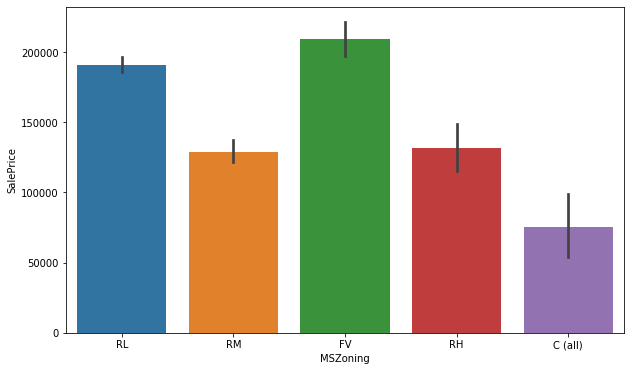

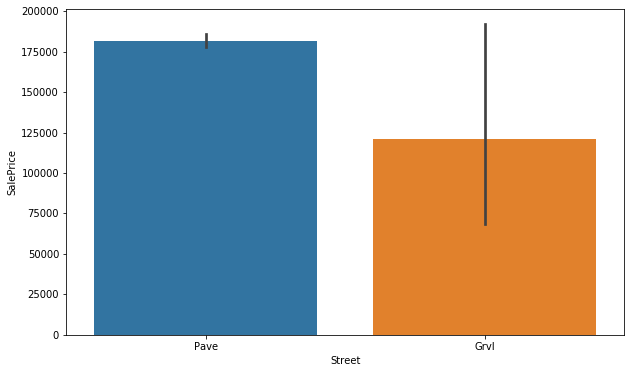

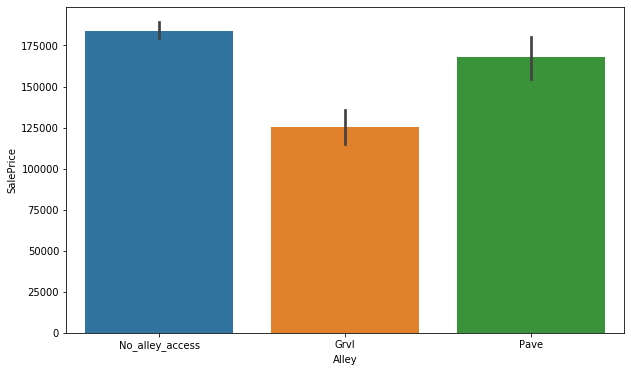

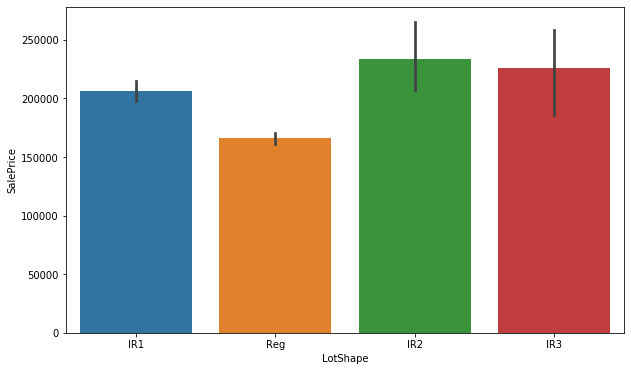

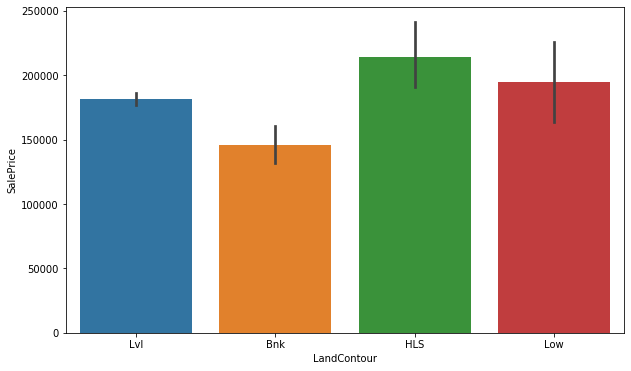

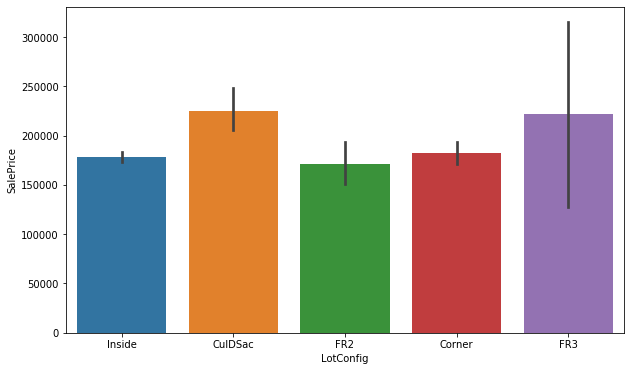

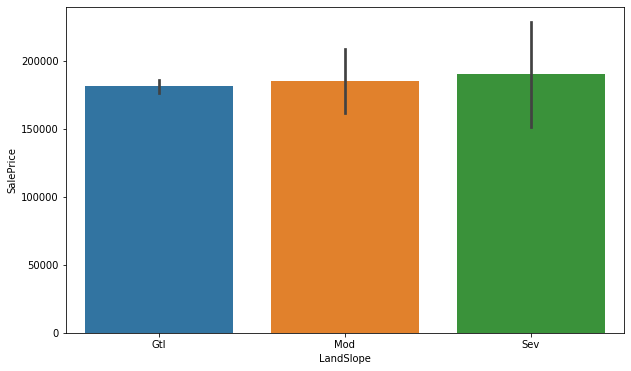

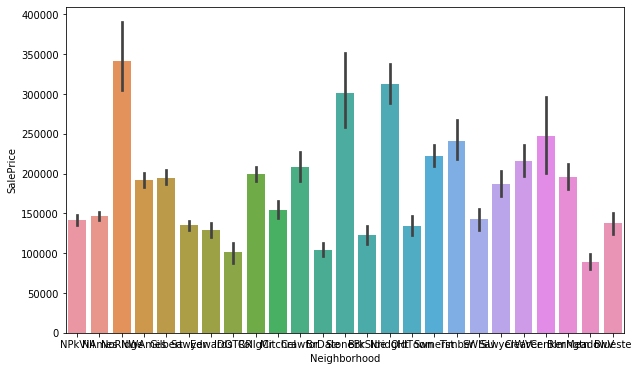

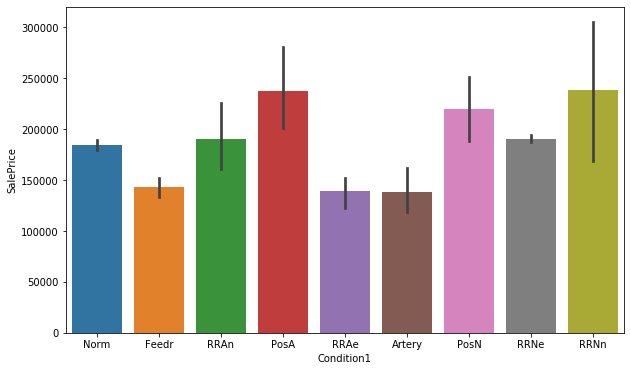

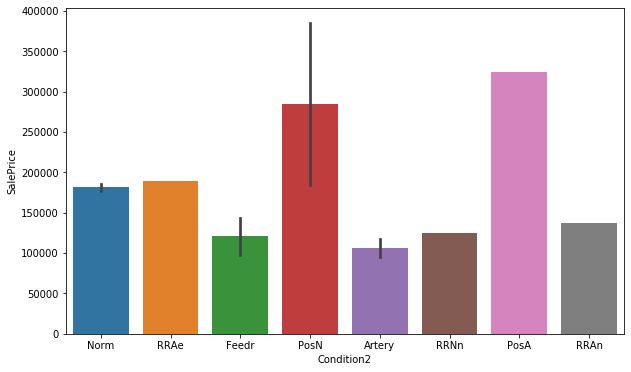

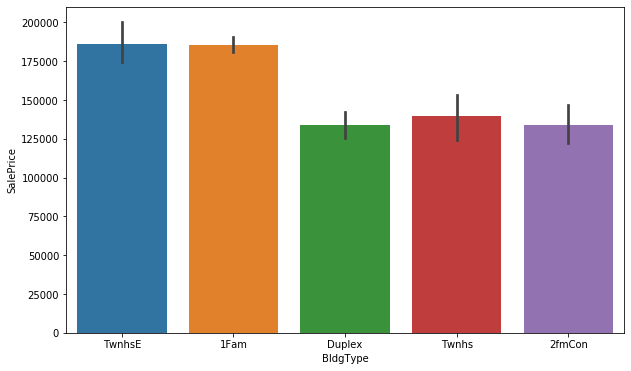

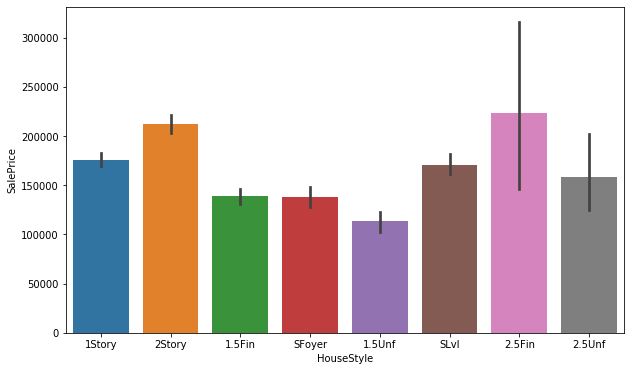

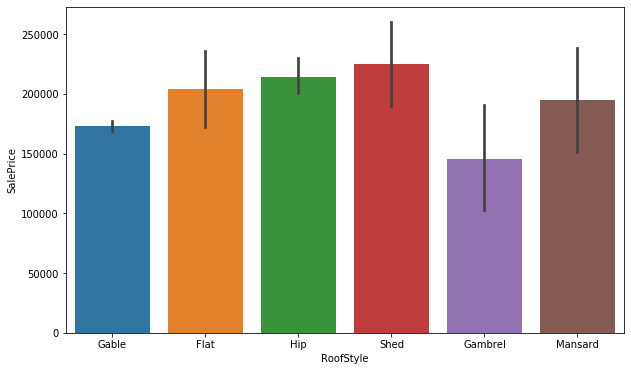

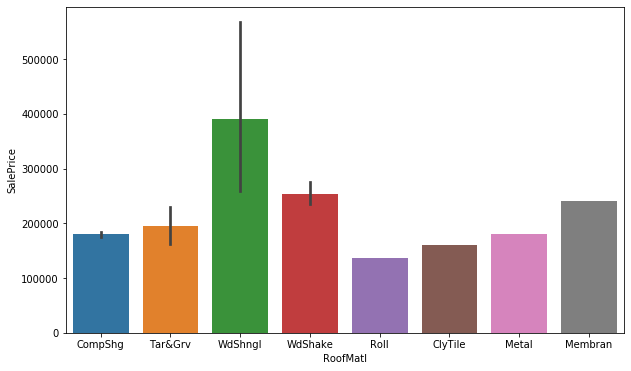

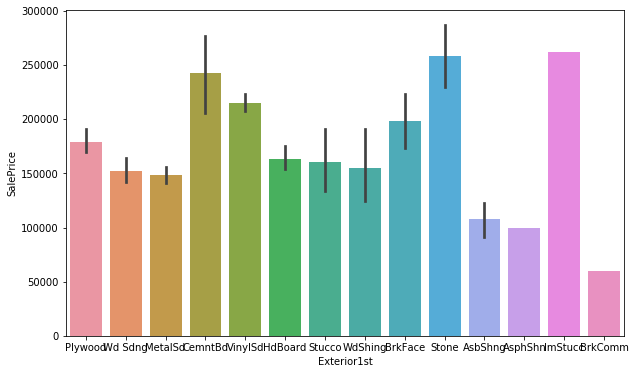

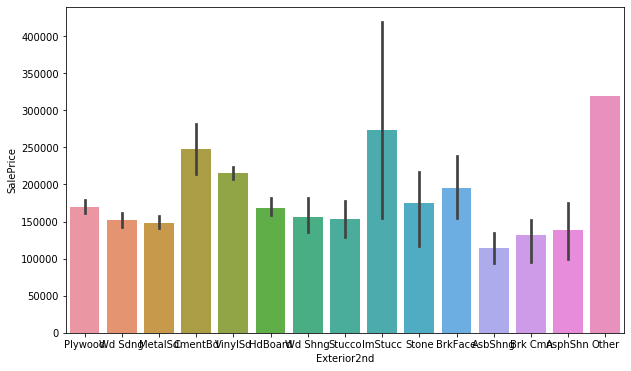

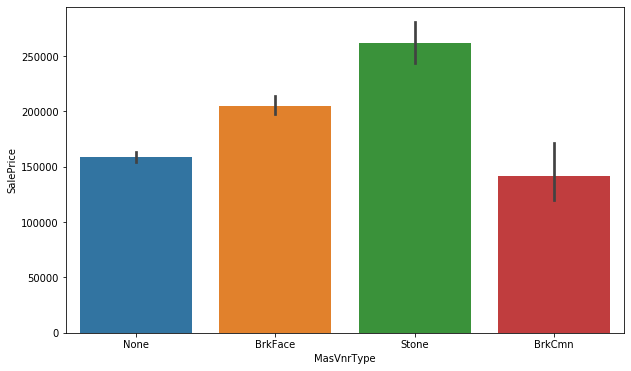

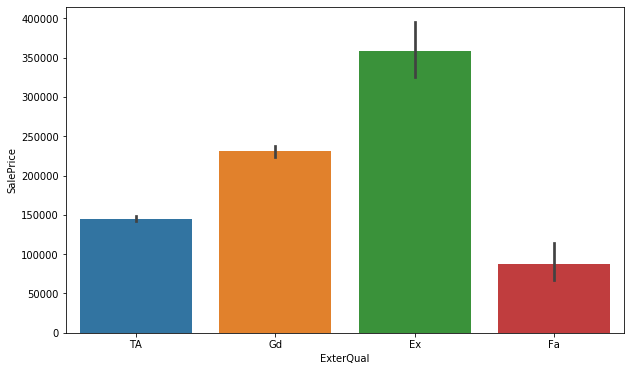

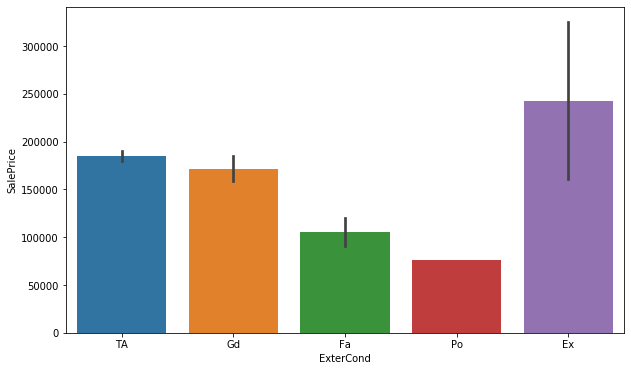

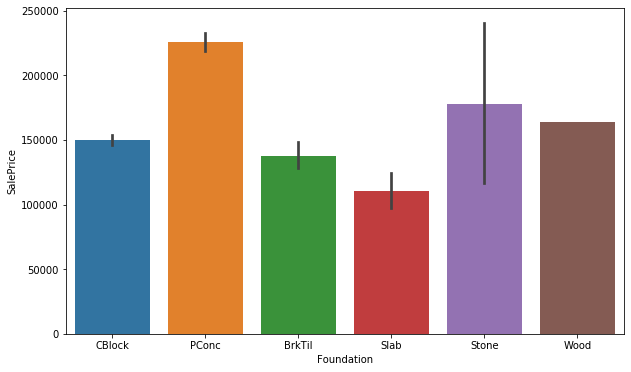

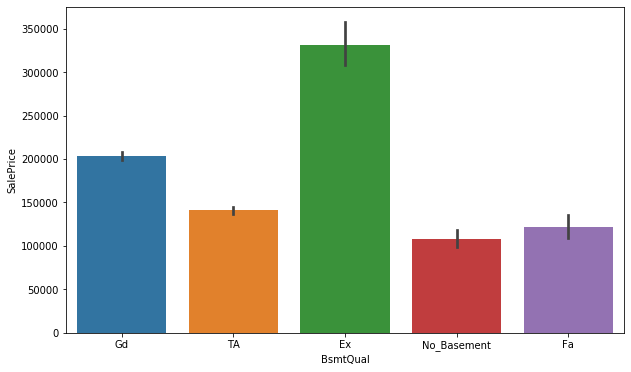

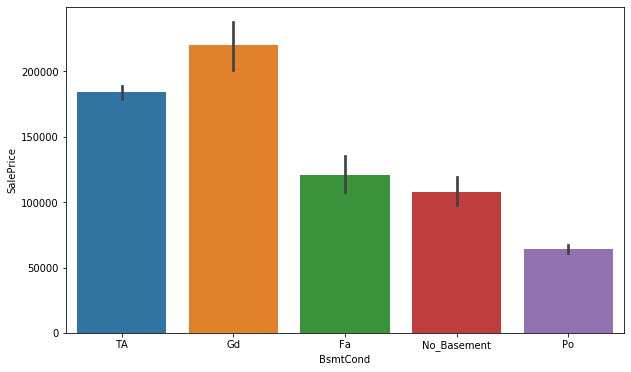

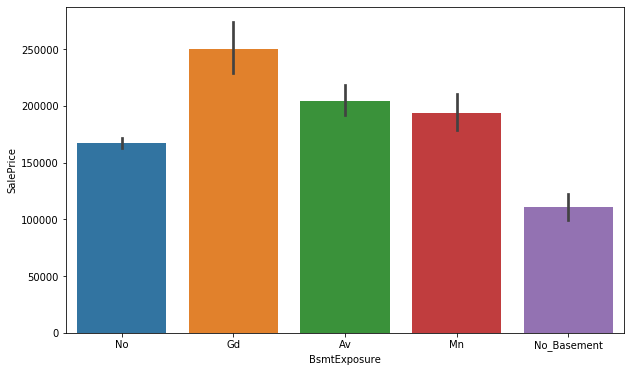

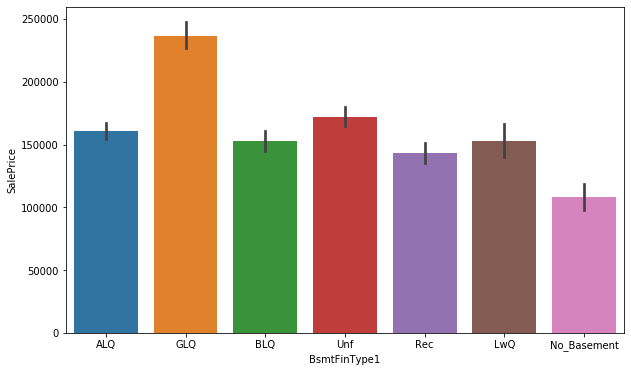

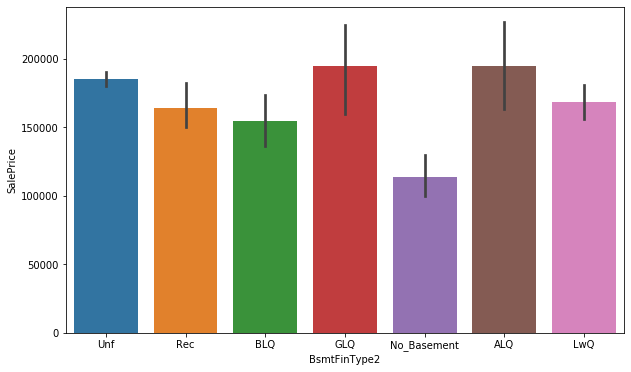

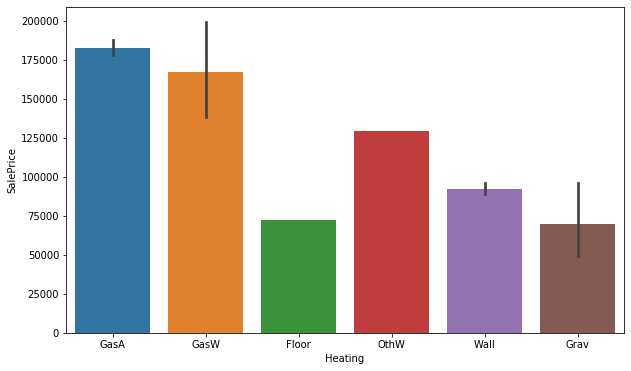

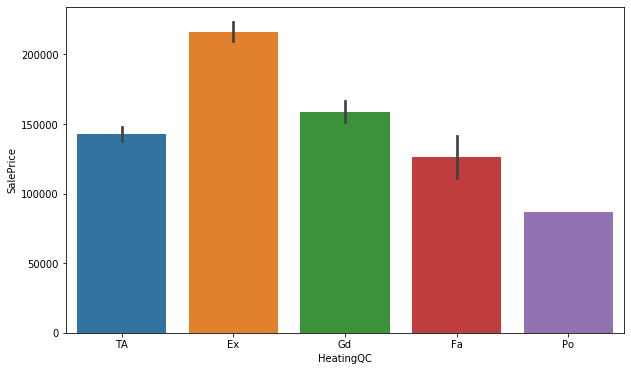

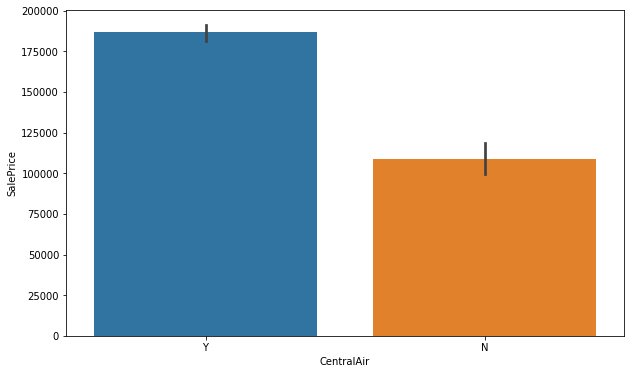

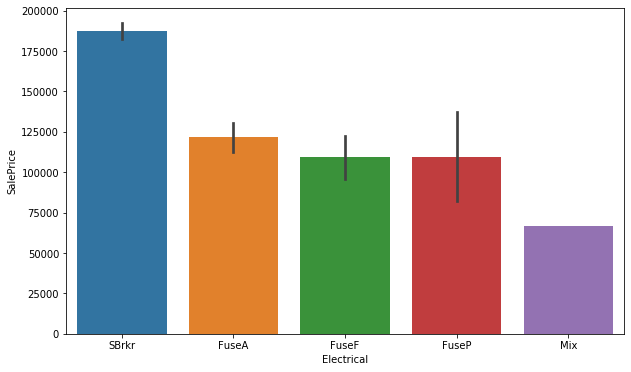

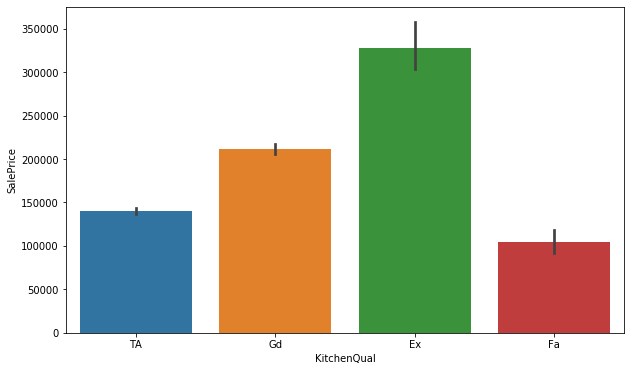

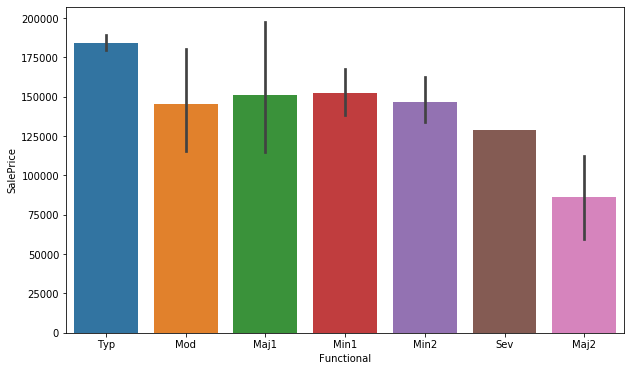

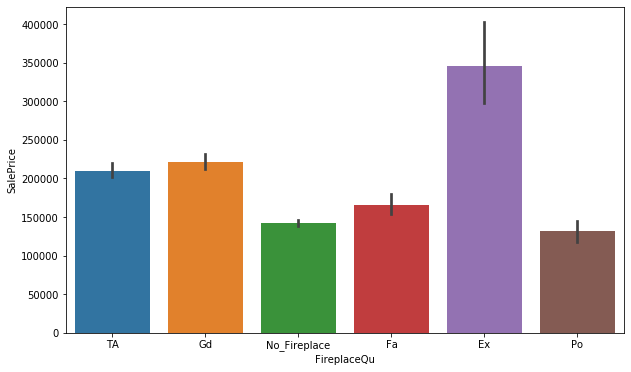

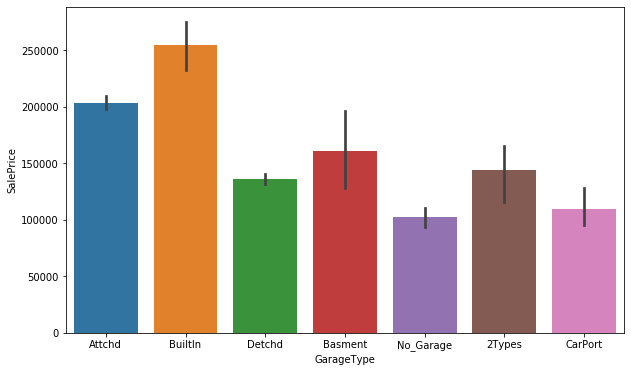

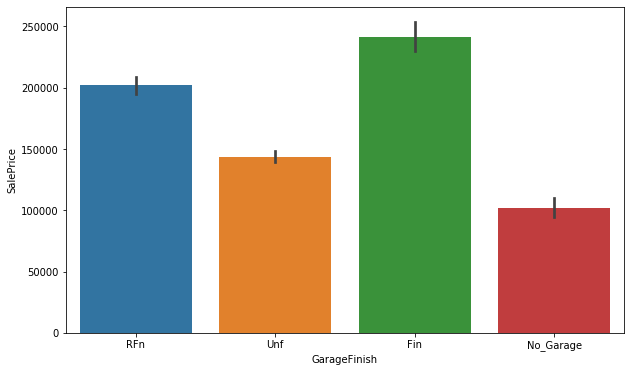

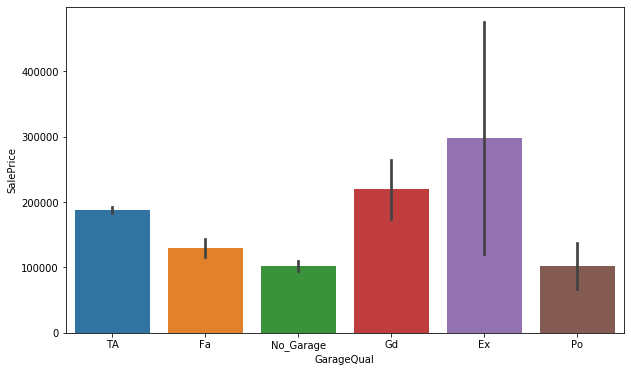

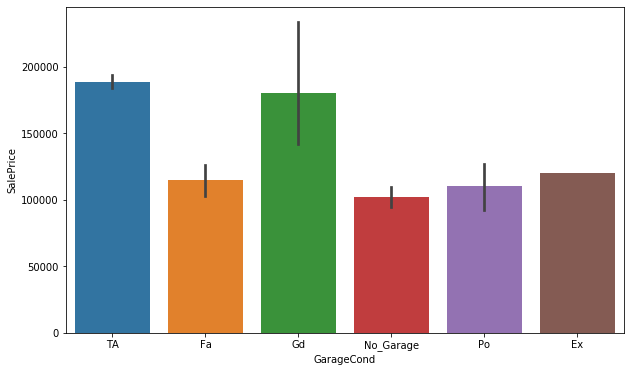

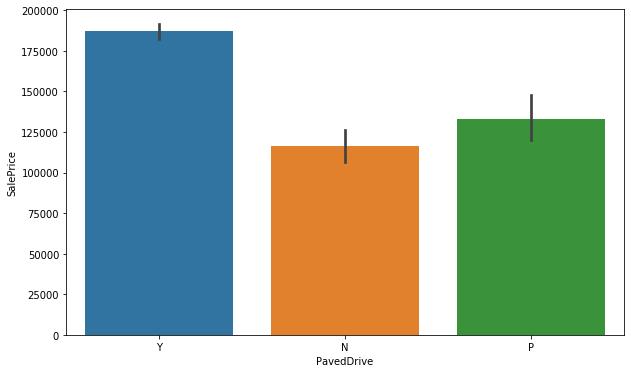

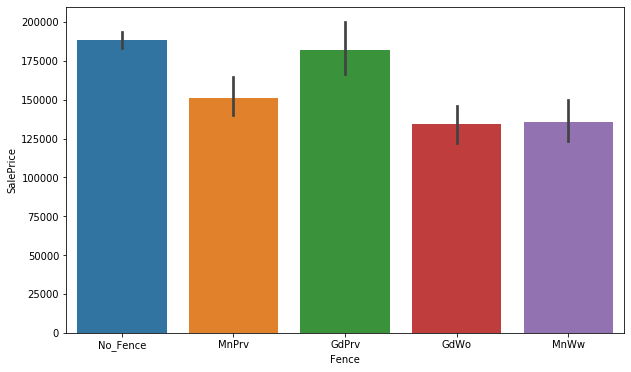

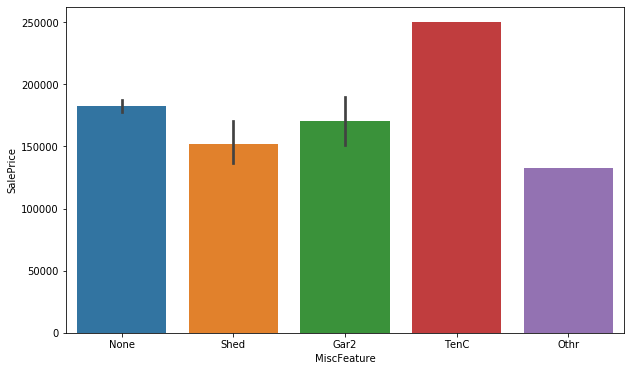

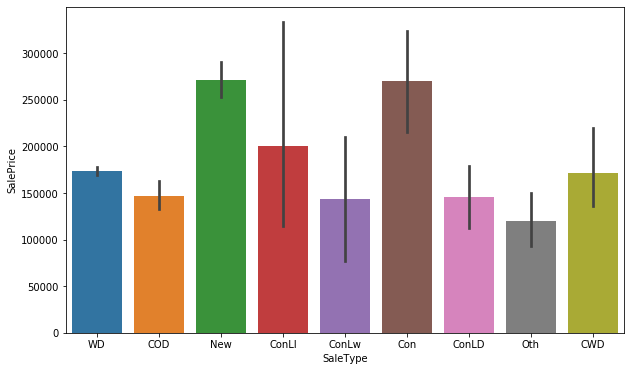

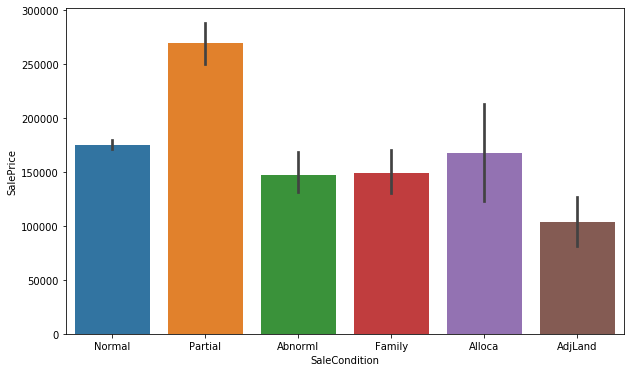

In [10]:
#Visualizing each categorical column wrt sale price
for i in categorical:
    plt.figure(figsize=(10,6))
    sns.barplot(x=df[i],y=df['SalePrice'])
    plt.show()

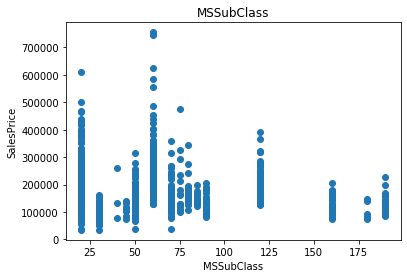

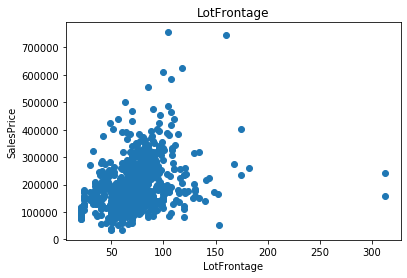

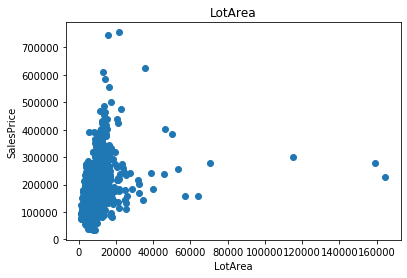

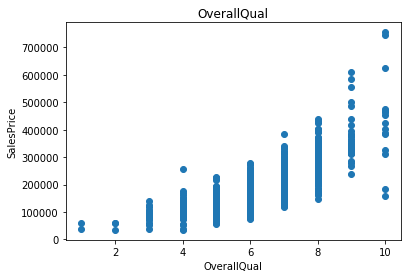

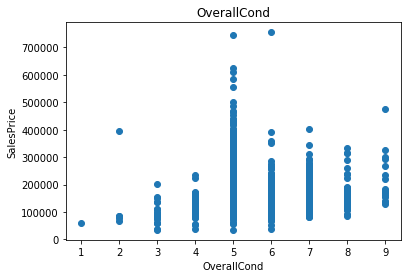

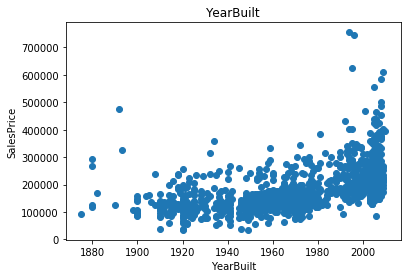

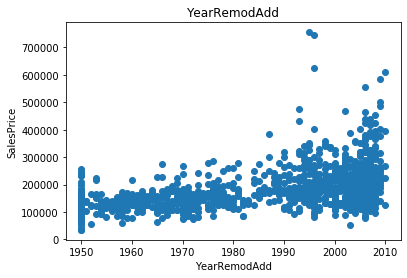

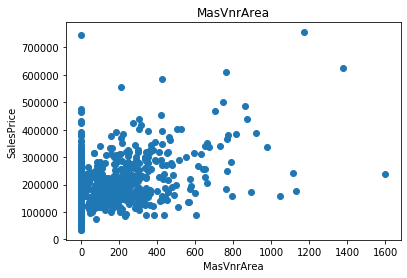

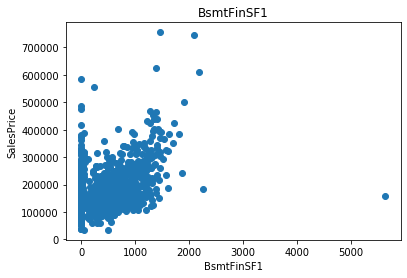

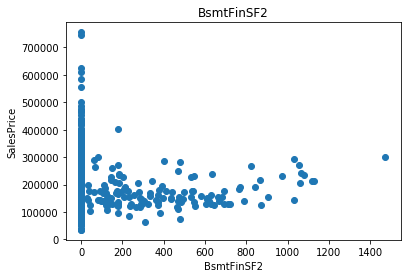

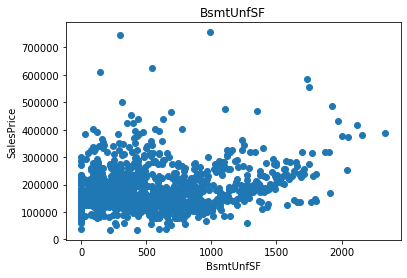

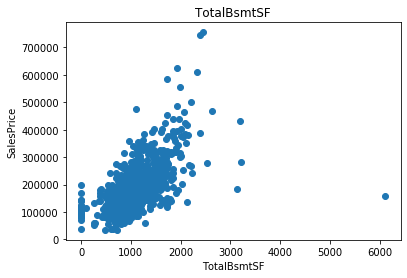

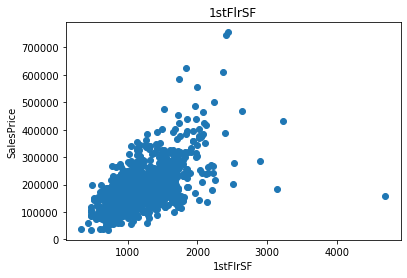

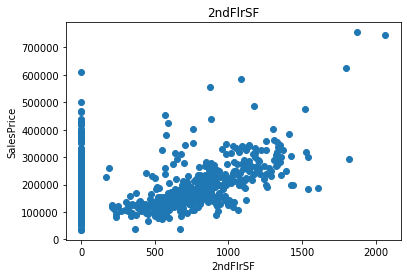

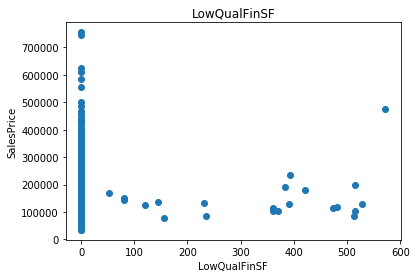

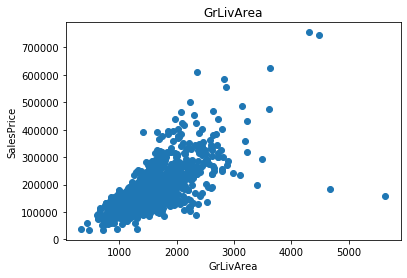

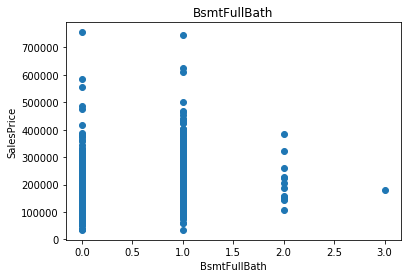

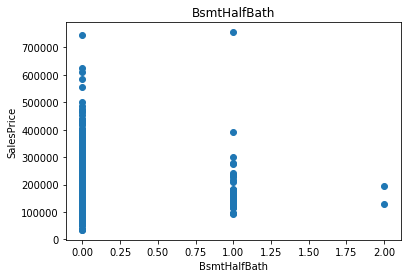

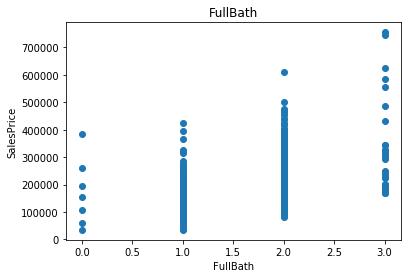

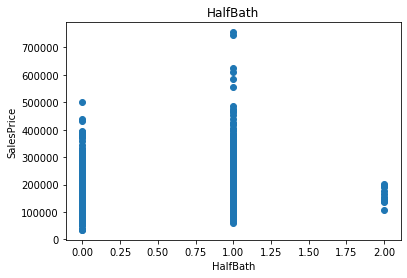

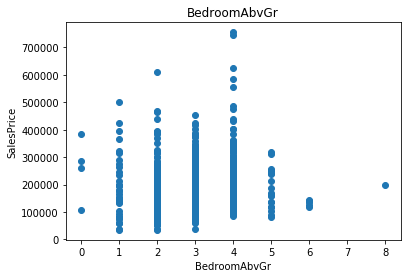

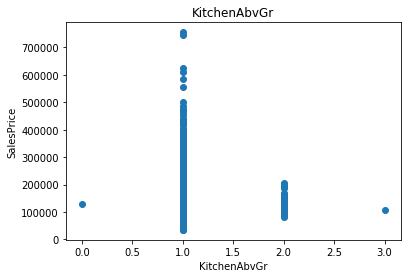

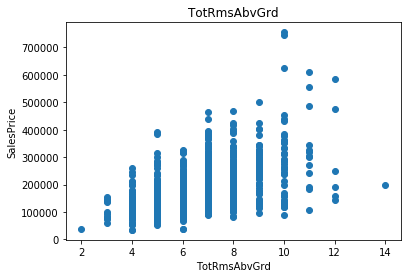

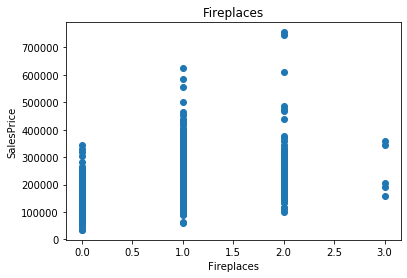

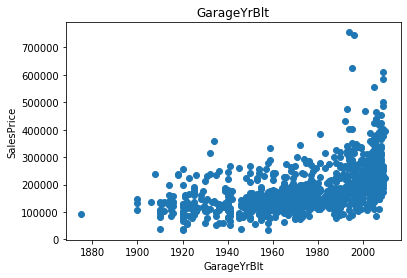

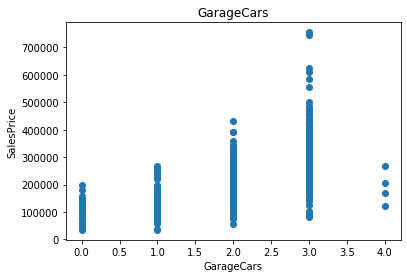

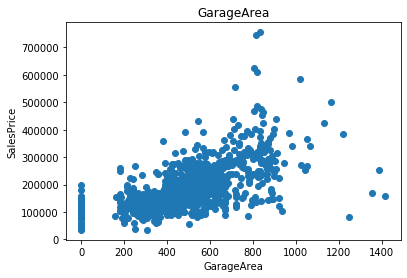

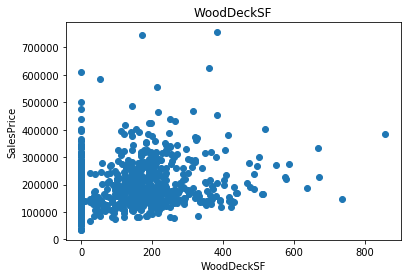

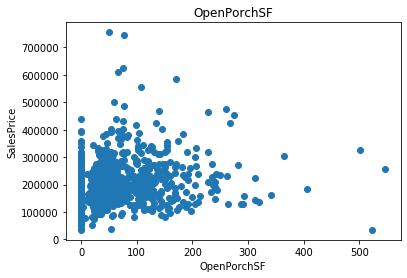

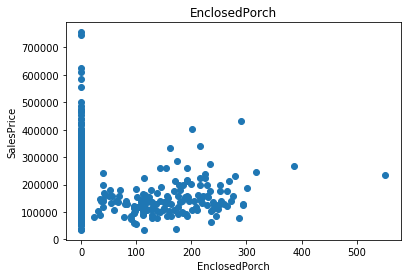

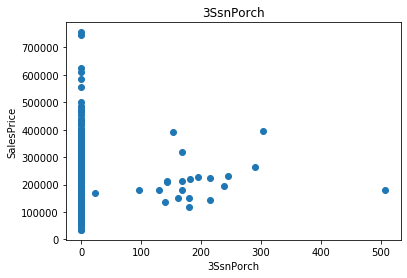

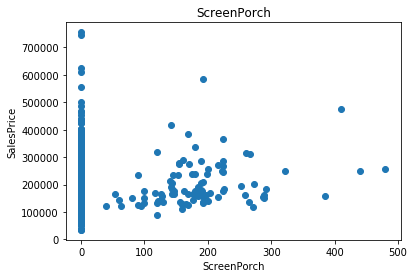

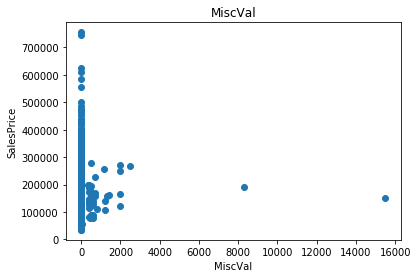

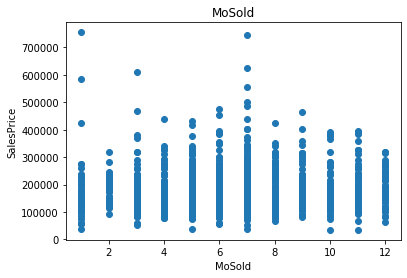

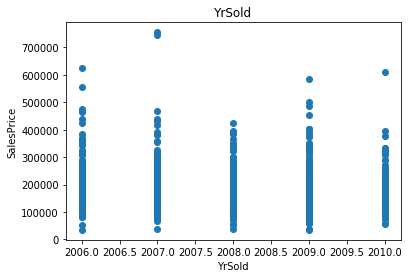

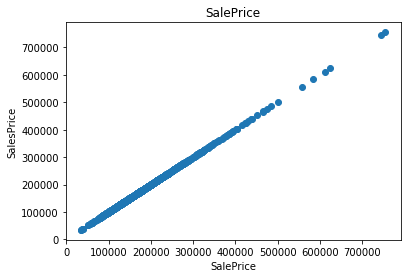

In [11]:
#Visualising sale price wrt to each continuous feature
for i in continuous:
    plt.scatter(df[i],df['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalesPrice')
    plt.title(i)
    plt.show()

# Obsevations:

1. MSZoning:The avg sale price of the house is maximum in FV(Floating Village Residential) foloowed by RL(Residential Low Density) zone
2. Street:The property that have access to paved road have much higher average sale price as compared to that with gravel street
3. Alley:houses that do not have access to alley have higher sale price as compared to those with paved or gravel alley
4. LotShape:sale price is not much affected by lotshape,however IR2(Moderately Irregular) have a bit higher price compared to other while Reg(Regular) have lowest avg sale price
5. LandContour:Flatness of the property-:HLS(Hillside - Significant slope from side to side) have maximum average sale price & Bnk(Banked - Quick and significant rise from street grade to building) have miimum average sale price
6. LandSlope: It doesn't affect the average sale price of house
7. Neighborhood:The houses that has a neighbourhood of NoRidge(Northridge) has the maximum sale price followed by that with a neighbourhood of NridgHt(Northridge Heights)
8. Condition1:house that is RRAn(Adjacent to North-South Railroad) has hightest avg sale price followed by PosA(Adjacent to postive off-site feature) while houses that is Artery(Adjacent to arterial street) has a minimum average sale price.
9. BldgType: Type of dwelling-:TwnhsE(Townhouse End Unit) & 1Fam(Single-family Detached) type house have hightset selling price.
10. HouseStyle: Style of dwelling-:The average sale price of 2.5Fin(Two and one-half story) is maximum followed by 2Story(Two story). 1.5Unf(One and one-half story: 2nd level unfinished) have lowest avg selling price
11. RoofMatl: Roof material-:House with roof material WdShngl(Wood Shingles) have a very high average selling price,followed by that with roof of WdShake(Wood Shakes),while house with roof material Roll(Roll) have lowest sale price
12. Exterior1st: Exterior covering on house-:House with exterior covering of ImStucc(Imitation Stucco) have maximum selling price while that with exterior coverng of BrkComm(Brick Common) have minimum average selling price
13. ExterQual: Evaluates the quality of the material on the exterior-:Houses with exterior material of excellent quality have highest saelling price followed by that of gd(good) quality
14. KitchenQual: Kitchen quality-:Houses with Ex(Excellent) kitchen quality have higher sale price while that with Fa(Fair) kitchen quality of lower selling price
15. LotFrontage: Linear feet of street connected to property-: Lot frontage doed not impact much on sale price since houses with different sale price are having same Lot frontage area
16. LotArea: Lot size in square feet-: LotArea doesn't affect sale price of the houses much, as can be seen different sale price are availble within the Lot area range of 0 to 20000.In fact some houses where Lot Area is very large have moderate sale price
17. OverallQual: Rates the overall material and finish of the house-:Overall quality is directly proportional to the sale price of houses
18. YearBuilt: & YearRemodAdd: Houses which are build latest have high sale price in comparison to those build in early years.similar is the case with remodelling date
19. BsmtFinSF1: Type 1 finished square feet-:Total sq ft of basement area is directly proportional to sale price. Houses with higher number of full bathrooms seems having high sale price
20. Kitchen: Kitchens above grade-:houses with 1 kitchen above ground have high sale price in comparison to those having 2 kitchens
21. Fireplaces: Number of fireplaces-:Houses with 1 and 2 fireplaces have higher prices in comparion to houses having 0 or 3 fireplaces
22. Wood deck,Enclosed porch,Three season porch, screen porch,pool area,Miscval do not have impact on sale price

In [12]:
#Statistical summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.00,190.0
LotFrontage,1168.0,70.807363,22.440317,21.0,60.00,70.0,79.25,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.50,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.00,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.00,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.00,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.00,2010.0
MasVnrArea,1168.0,101.696918,182.218483,0.0,0.00,0.0,160.00,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.50,5644.0
BsmtFinSF2,1168.0,46.647260,163.520016,0.0,0.00,0.0,0.00,1474.0


1. count is same for all the columns
2. for some columns mean is greater than 50% and for some columns mean is lesser than 50%
3. for all the columns there is a difference between max and 75%

In [14]:
#correaltion of columns
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.336234,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.028215,-0.052236,-0.062403,...,-0.092408,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.336234,1.000000,0.296790,0.229981,-0.047851,0.112000,0.089513,0.188273,0.227732,0.001253,...,0.322750,0.087267,0.151044,0.021103,0.050499,0.030440,-0.002830,0.022579,-0.004162,0.323851
LotArea,-0.124151,0.296790,1.000000,0.107188,0.017513,0.005506,0.027228,0.120192,0.221851,0.056656,...,0.195162,0.216720,0.093080,-0.007446,0.025794,0.025256,0.051679,0.015141,-0.035399,0.249499
OverallQual,0.070462,0.229981,0.107188,1.000000,-0.083167,0.575800,0.555945,0.403985,0.219643,-0.040893,...,0.566782,0.227137,0.341030,-0.098374,0.045919,0.059387,-0.025786,0.090638,-0.048759,0.789185
OverallCond,-0.056978,-0.047851,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.135133,-0.028810,0.044336,...,-0.126021,0.012290,-0.024899,0.056074,0.040476,0.069463,0.075178,0.005519,0.055517,-0.065642
YearBuilt,0.023988,0.112000,0.005506,0.575800,-0.377731,1.000000,0.592829,0.318562,0.227933,-0.027682,...,0.473216,0.204830,0.191069,-0.373544,0.037079,-0.058760,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,0.056618,0.089513,0.027228,0.555945,0.080669,0.592829,1.000000,0.178583,0.114430,-0.044694,...,0.387744,0.197410,0.238755,-0.193574,0.064763,-0.046220,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,0.028215,0.188273,0.120192,0.403985,-0.135133,0.318562,0.178583,1.000000,0.263377,-0.064685,...,0.363537,0.152083,0.127876,-0.102142,0.019123,0.047375,-0.027263,0.012707,-0.013220,0.460535
BsmtFinSF1,-0.052236,0.227732,0.221851,0.219643,-0.028810,0.227933,0.114430,0.263377,1.000000,-0.052145,...,0.286290,0.192939,0.108802,-0.082351,0.025485,0.033490,0.008314,0.007482,0.005614,0.362874
BsmtFinSF2,-0.062403,0.001253,0.056656,-0.040893,0.044336,-0.027682,-0.044694,-0.064685,-0.052145,1.000000,...,-0.002051,0.094690,-0.014103,0.032081,-0.031263,0.076561,0.007915,-0.014605,0.038438,-0.010151


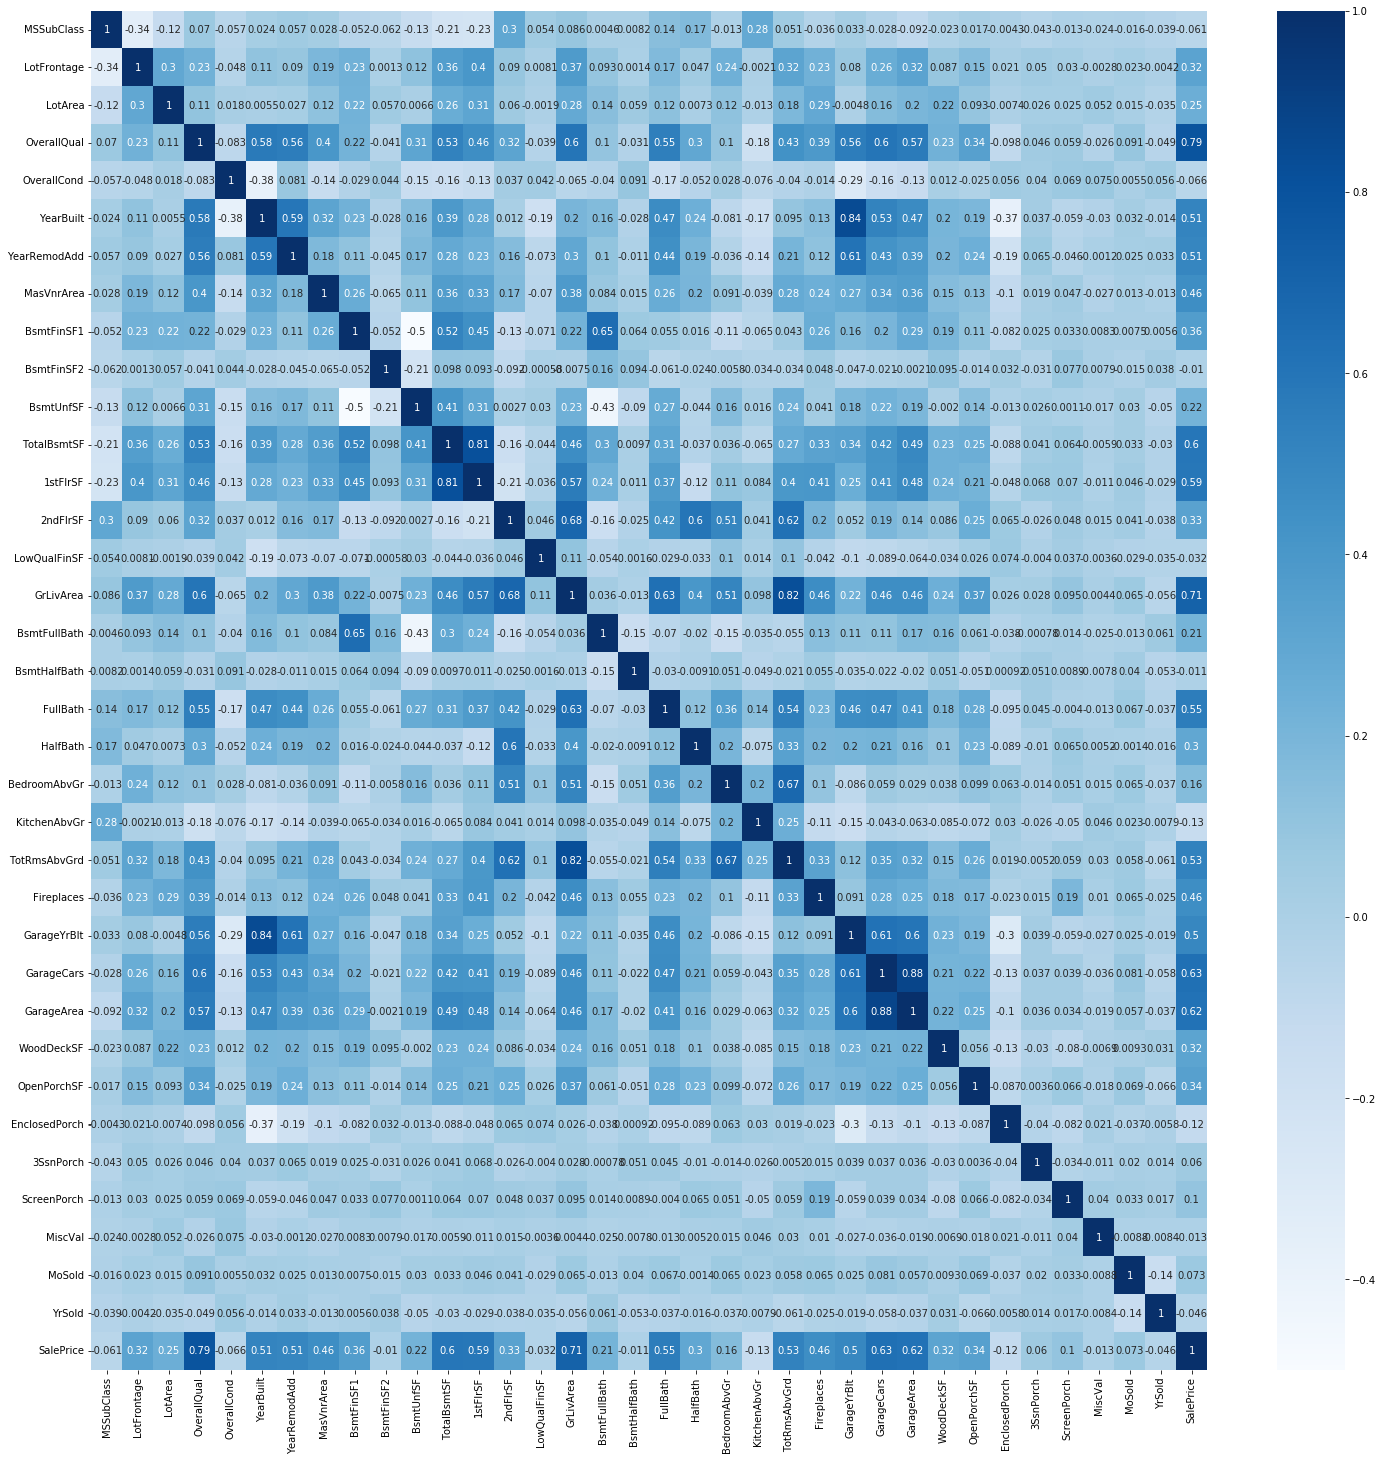

In [16]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),cmap="Blues",annot=True)

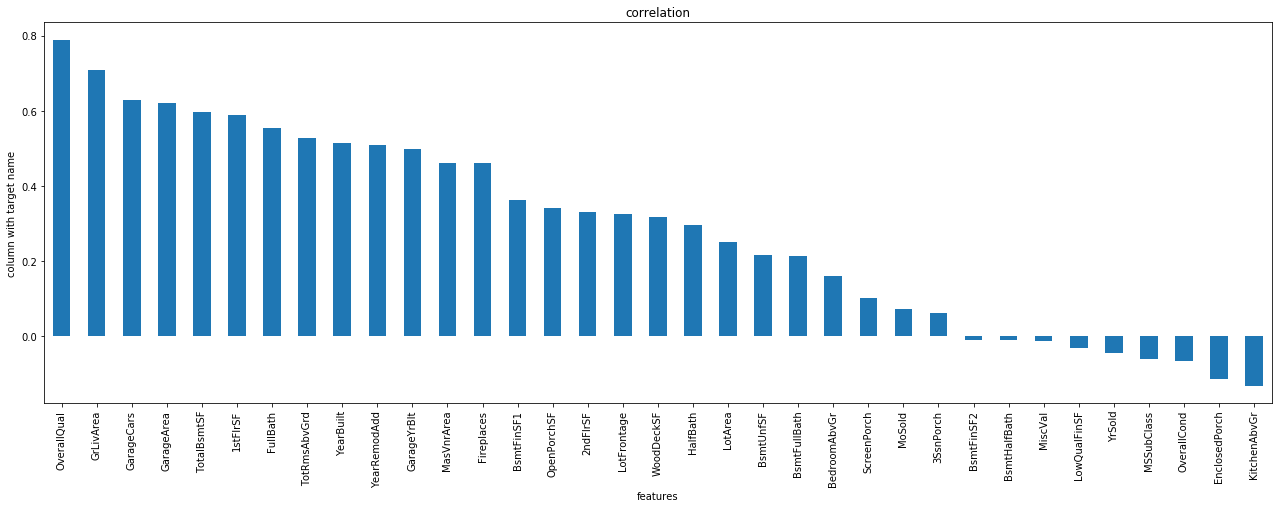

In [17]:
plt.figure(figsize=(22,7))
df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('column with target name')
plt.title('correlation')
plt.show()

1. 'OverallQual' & 'GrLivArea' are highly positively correlated with target column
2. 'EnclosedPorch' & 'KitchenAbvGr' are highly negatively correlated with target column
3. 'MSSubClass' ,'OverallCond' ,'OverallCond' ,'LowQualFinSF' ,'BsmtHalfBath' ,'YrSold', 'MiscVal', 'MoSold', '3SsnPorch' are least correlated with the target column

In [18]:
#Dropping the least correlated columns from the dataset
df.drop(['MSSubClass' ,'LowQualFinSF' ,'BsmtHalfBath' ,'BsmtUnfSF' ,'YrSold', 'MiscVal',
               'MoSold', '3SsnPorch'],axis=1,inplace=True)

In [19]:
df.skew().sort_values()

GarageYrBlt      -0.673163
YearBuilt        -0.579204
YearRemodAdd     -0.495864
GarageCars       -0.358556
FullBath          0.057809
OverallQual       0.175082
GarageArea        0.189665
BedroomAbvGr      0.243855
OverallCond       0.580714
BsmtFullBath      0.627106
TotRmsAbvGrd      0.644657
HalfBath          0.656492
Fireplaces        0.671966
2ndFlrSF          0.823479
GrLivArea         1.449952
WoodDeckSF        1.504929
1stFlrSF          1.513707
TotalBsmtSF       1.744591
BsmtFinSF1        1.871606
SalePrice         1.953878
OpenPorchSF       2.410840
LotFrontage       2.733440
MasVnrArea        2.835718
EnclosedPorch     3.043610
ScreenPorch       4.105741
KitchenAbvGr      4.365259
BsmtFinSF2        4.365829
LotArea          10.659285
dtype: float64

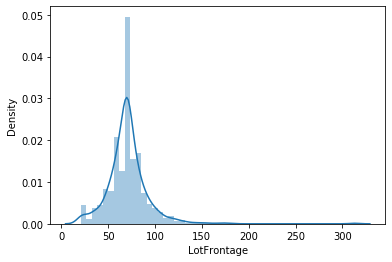

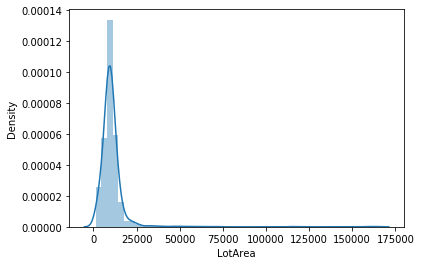

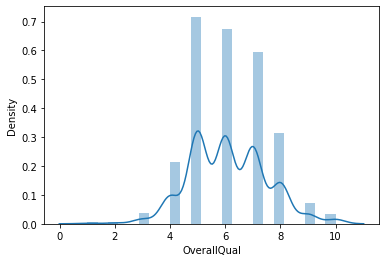

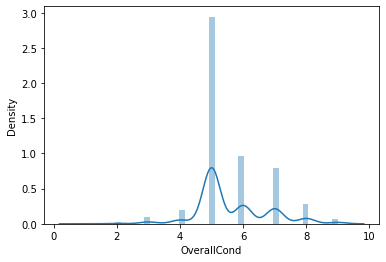

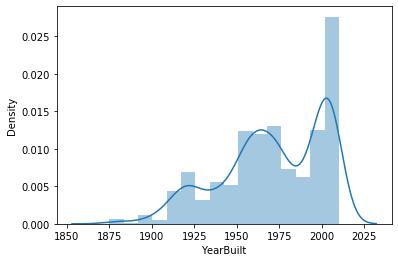

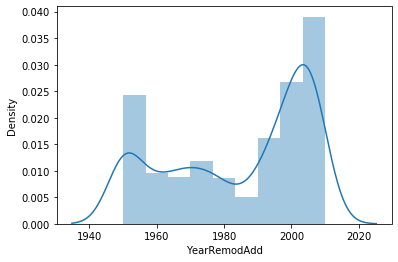

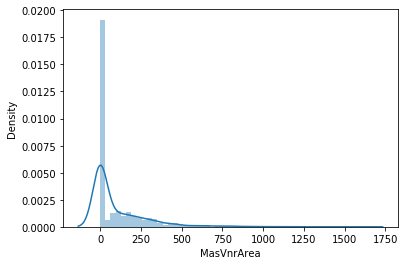

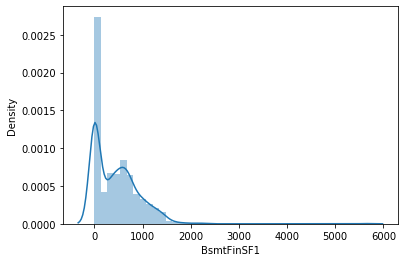

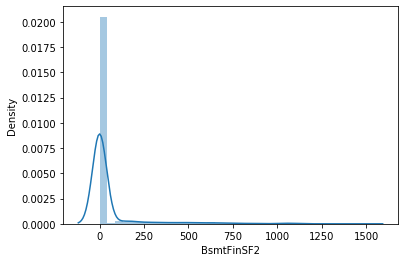

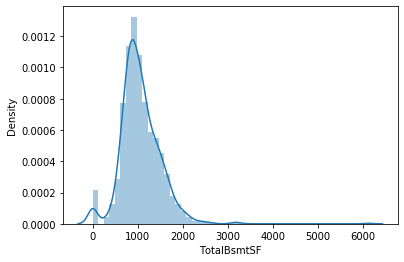

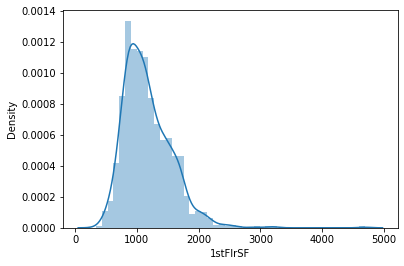

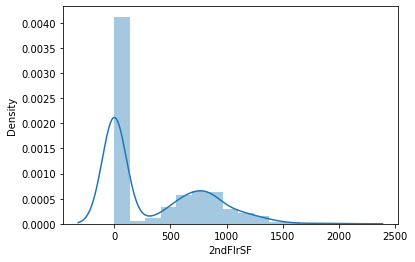

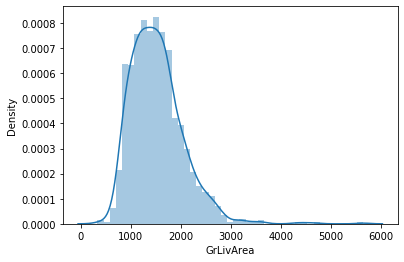

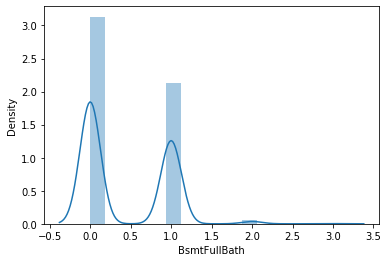

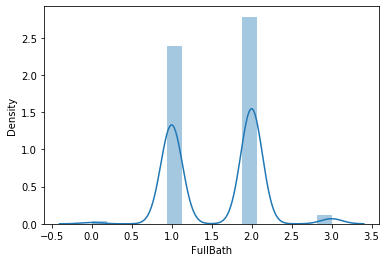

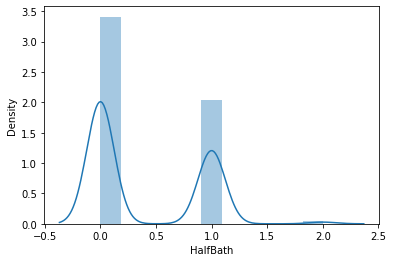

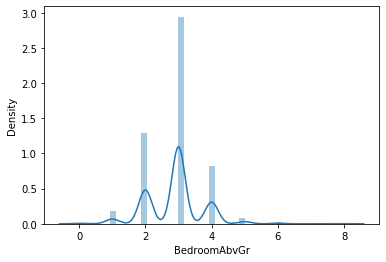

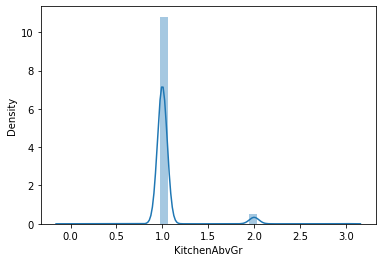

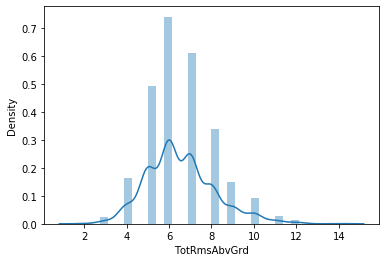

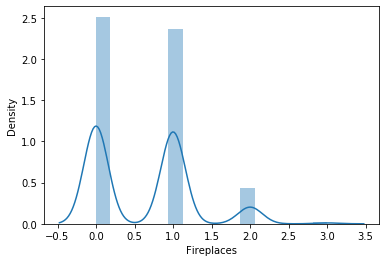

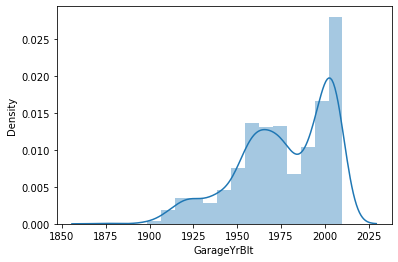

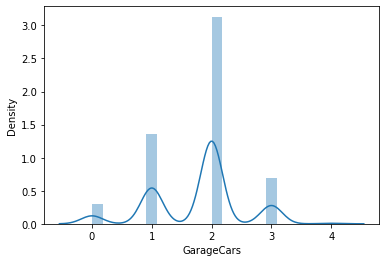

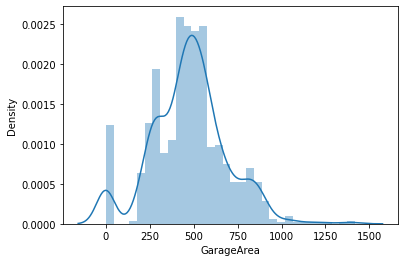

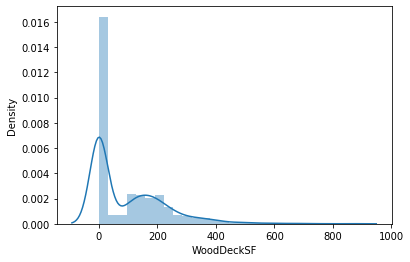

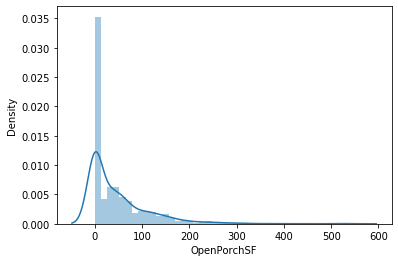

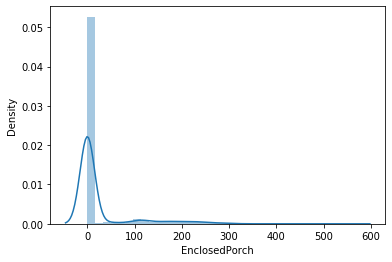

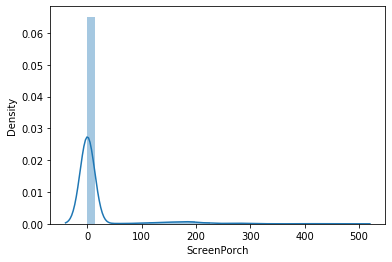

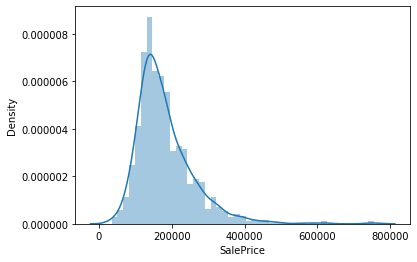

In [20]:
#checking the distribution of skewness
for col in df.describe().columns:
    sns.distplot(df[col])
    plt.show()

data is not normally distributed, so skewness is present

In [21]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [22]:
df

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,3,70.0,4928,1,1,0,3,4,0,13,...,2,0,205,0,0,4,1,8,4,128000
1,3,95.0,15865,1,1,0,3,4,1,12,...,2,81,207,0,224,4,1,8,4,268000
2,3,92.0,9920,1,1,0,3,1,0,15,...,2,180,130,0,0,4,1,8,4,269790
3,3,105.0,11751,1,1,0,3,4,0,14,...,2,0,122,0,0,2,1,0,4,190000
4,3,70.0,16635,1,1,0,3,2,0,14,...,2,240,0,0,0,4,1,8,4,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,3,70.0,9819,1,1,0,3,4,0,19,...,2,0,0,0,0,2,1,8,4,122000
1164,3,67.0,8777,1,1,3,3,4,0,7,...,0,0,96,0,0,2,1,8,4,108000
1165,3,24.0,2280,1,1,3,3,2,0,13,...,2,87,0,0,0,4,1,8,4,148500
1166,0,50.0,8500,1,2,3,3,4,0,9,...,0,0,54,172,0,2,1,8,4,40000


MSZoning            AxesSubplot(0.125,0.826831;0.0824468x0.053169)
LotFrontage      AxesSubplot(0.223936,0.826831;0.0824468x0.053169)
LotArea          AxesSubplot(0.322872,0.826831;0.0824468x0.053169)
Street           AxesSubplot(0.421809,0.826831;0.0824468x0.053169)
Alley            AxesSubplot(0.520745,0.826831;0.0824468x0.053169)
                                       ...                        
Fence               AxesSubplot(0.125,0.316408;0.0824468x0.053169)
MiscFeature      AxesSubplot(0.223936,0.316408;0.0824468x0.053169)
SaleType         AxesSubplot(0.322872,0.316408;0.0824468x0.053169)
SaleCondition    AxesSubplot(0.421809,0.316408;0.0824468x0.053169)
SalePrice        AxesSubplot(0.520745,0.316408;0.0824468x0.053169)
Length: 69, dtype: object

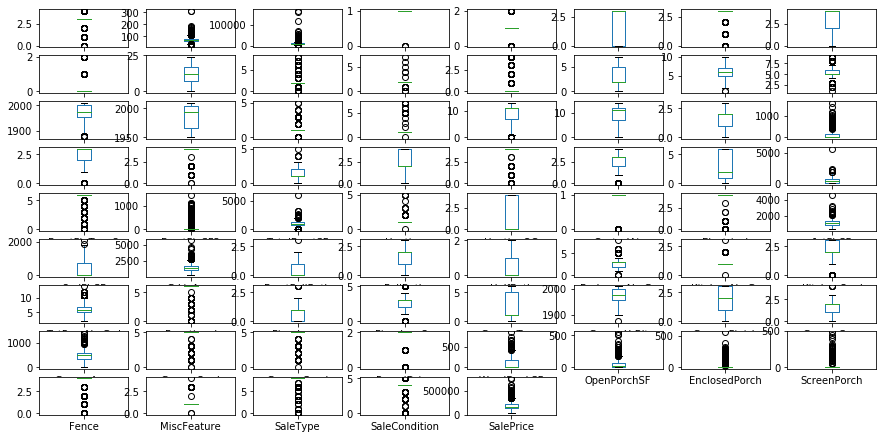

In [23]:
#checking outliers
df.plot(kind='box',subplots=True,layout=(12,8),figsize=(15,10))

outliers are present in the dataset

In [27]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.02164599, 0.03599365, 0.62061571, ..., 0.33003329, 0.20793187,
        0.67631017],
       [0.02164599, 1.07854983, 0.60090318, ..., 0.33003329, 0.20793187,
        1.09423443],
       [0.02164599, 0.94480461, 0.06307504, ..., 0.33003329, 0.20793187,
        1.11687211],
       ...,
       [0.02164599, 2.08675364, 0.91636244, ..., 0.33003329, 0.20793187,
        0.41705186],
       [4.76211672, 0.92762843, 0.22167034, ..., 0.33003329, 0.20793187,
        1.78922393],
       [0.02164599, 0.03599365, 0.29303823, ..., 0.33003329, 0.20793187,
        0.02179027]])

In [30]:
threshold=3
print(np.where(z<6))

(array([   0,    0,    0, ..., 1167, 1167, 1167], dtype=int64), array([ 0,  1,  2, ..., 66, 67, 68], dtype=int64))


In [31]:
dfnew=df[(z<6).all(axis=1)]
dfnew

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,3,70.0,4928,1,1,0,3,4,0,13,...,2,0,205,0,0,4,1,8,4,128000
2,3,92.0,9920,1,1,0,3,1,0,15,...,2,180,130,0,0,4,1,8,4,269790
3,3,105.0,11751,1,1,0,3,4,0,14,...,2,0,122,0,0,2,1,0,4,190000
4,3,70.0,16635,1,1,0,3,2,0,14,...,2,240,0,0,0,4,1,8,4,215000
5,3,58.0,14054,1,1,0,3,4,0,8,...,2,100,17,0,0,4,1,6,5,219210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,3,70.0,9819,1,1,0,3,4,0,19,...,2,0,0,0,0,2,1,8,4,122000
1164,3,67.0,8777,1,1,3,3,4,0,7,...,0,0,96,0,0,2,1,8,4,108000
1165,3,24.0,2280,1,1,3,3,2,0,13,...,2,87,0,0,0,4,1,8,4,148500
1166,0,50.0,8500,1,2,3,3,4,0,9,...,0,0,54,172,0,2,1,8,4,40000


73 rows are dropped

In [34]:
#separating columns into features and target
x=dfnew.drop('SalePrice',axis=1)
y=dfnew['SalePrice']

In [35]:
x

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,SaleType,SaleCondition
0,3,70.0,4928,1,1,0,3,4,0,13,...,5,2,0,205,0,0,4,1,8,4
2,3,92.0,9920,1,1,0,3,1,0,15,...,5,2,180,130,0,0,4,1,8,4
3,3,105.0,11751,1,1,0,3,4,0,14,...,5,2,0,122,0,0,2,1,0,4
4,3,70.0,16635,1,1,0,3,2,0,14,...,5,2,240,0,0,0,4,1,8,4
5,3,58.0,14054,1,1,0,3,4,0,8,...,5,2,100,17,0,0,4,1,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,3,70.0,9819,1,1,0,3,4,0,19,...,5,2,0,0,0,0,2,1,8,4
1164,3,67.0,8777,1,1,3,3,4,0,7,...,5,0,0,96,0,0,2,1,8,4
1165,3,24.0,2280,1,1,3,3,2,0,13,...,5,2,87,0,0,0,4,1,8,4
1166,0,50.0,8500,1,2,3,3,4,0,9,...,1,0,0,54,172,0,2,1,8,4


In [36]:
y

0       128000
2       269790
3       190000
4       215000
5       219210
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1095, dtype: int64

In [37]:
#removing skewness
import sklearn
from sklearn.preprocessing import power_transform

In [38]:
x=power_transform(x,method='yeo-johnson')

In [39]:
x

array([[-0.16315395,  0.04572657, -1.27273384, ..., -0.13043251,
         0.41408049,  0.00941838],
       [-0.16315395,  1.11881527,  0.17093382, ..., -0.13043251,
         0.41408049,  0.00941838],
       [-0.16315395,  1.71643041,  0.59454473, ..., -0.13043251,
        -2.76224319,  0.00941838],
       ...,
       [-0.16315395, -2.63178506, -2.41497978, ..., -0.13043251,
         0.41408049,  0.00941838],
       [-2.95160412, -1.02150011, -0.18816839, ..., -0.13043251,
         0.41408049,  0.00941838],
       [-0.16315395,  0.04572657, -0.36051361, ..., -0.13043251,
         0.41408049,  0.00941838]])

In [40]:
x=pd.DataFrame(x)  #coverting numpy to panda

In [41]:
x

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,-0.163154,0.045727,-1.272734,0.0,-0.005932,-1.404519,0.315244,0.597688,-0.204609,0.201831,...,0.302855,0.290100,-0.962270,1.427281,-0.410637,-0.286384,0.501544,-0.130433,0.414080,0.009418
1,-0.163154,1.118815,0.170934,0.0,-0.005932,-1.404519,0.315244,-1.554730,-0.204609,0.517647,...,0.302855,0.290100,1.047549,1.217369,-0.410637,-0.286384,0.501544,-0.130433,0.414080,0.009418
2,-0.163154,1.716430,0.594545,0.0,-0.005932,-1.404519,0.315244,0.597688,-0.204609,0.360987,...,0.302855,0.290100,-0.962270,1.188137,-0.410637,-0.286384,-1.948237,-0.130433,-2.762243,0.009418
3,-0.163154,0.045727,1.572109,0.0,-0.005932,-1.404519,0.315244,-1.113363,-0.204609,0.360987,...,0.302855,0.290100,1.140126,-1.052909,-0.410637,-0.286384,0.501544,-0.130433,0.414080,0.009418
4,-0.163154,-0.581695,1.078746,0.0,-0.005932,-1.404519,0.315244,0.597688,-0.204609,-0.640768,...,0.302855,0.290100,0.853621,0.295198,-0.410637,-0.286384,0.501544,-0.130433,-2.212696,2.230032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,-0.163154,0.045727,0.146364,0.0,-0.005932,-1.404519,0.315244,0.597688,-0.204609,1.122826,...,0.302855,0.290100,-0.962270,-1.052909,-0.410637,-0.286384,-1.948237,-0.130433,0.414080,0.009418
1091,-0.163154,-0.107912,-0.115671,0.0,-0.005932,0.731100,0.315244,0.597688,-0.204609,-0.821399,...,0.302855,-3.450478,-0.962270,1.077947,-0.410637,-0.286384,-1.948237,-0.130433,0.414080,0.009418
1092,-0.163154,-2.631785,-2.414980,0.0,-0.005932,0.731100,0.315244,-1.113363,-0.204609,0.201831,...,0.302855,0.290100,0.806760,-1.052909,-0.410637,-0.286384,0.501544,-0.130433,0.414080,0.009418
1093,-2.951604,-1.021500,-0.188168,0.0,4.206058,0.731100,0.315244,0.597688,-0.204609,-0.464838,...,-3.307612,-3.450478,-0.962270,0.814508,2.437275,-0.286384,-1.948237,-0.130433,0.414080,0.009418


In [42]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scale=sc.fit_transform(x)

In [43]:
x

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,-0.163154,0.045727,-1.272734,0.0,-0.005932,-1.404519,0.315244,0.597688,-0.204609,0.201831,...,0.302855,0.290100,-0.962270,1.427281,-0.410637,-0.286384,0.501544,-0.130433,0.414080,0.009418
1,-0.163154,1.118815,0.170934,0.0,-0.005932,-1.404519,0.315244,-1.554730,-0.204609,0.517647,...,0.302855,0.290100,1.047549,1.217369,-0.410637,-0.286384,0.501544,-0.130433,0.414080,0.009418
2,-0.163154,1.716430,0.594545,0.0,-0.005932,-1.404519,0.315244,0.597688,-0.204609,0.360987,...,0.302855,0.290100,-0.962270,1.188137,-0.410637,-0.286384,-1.948237,-0.130433,-2.762243,0.009418
3,-0.163154,0.045727,1.572109,0.0,-0.005932,-1.404519,0.315244,-1.113363,-0.204609,0.360987,...,0.302855,0.290100,1.140126,-1.052909,-0.410637,-0.286384,0.501544,-0.130433,0.414080,0.009418
4,-0.163154,-0.581695,1.078746,0.0,-0.005932,-1.404519,0.315244,0.597688,-0.204609,-0.640768,...,0.302855,0.290100,0.853621,0.295198,-0.410637,-0.286384,0.501544,-0.130433,-2.212696,2.230032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,-0.163154,0.045727,0.146364,0.0,-0.005932,-1.404519,0.315244,0.597688,-0.204609,1.122826,...,0.302855,0.290100,-0.962270,-1.052909,-0.410637,-0.286384,-1.948237,-0.130433,0.414080,0.009418
1091,-0.163154,-0.107912,-0.115671,0.0,-0.005932,0.731100,0.315244,0.597688,-0.204609,-0.821399,...,0.302855,-3.450478,-0.962270,1.077947,-0.410637,-0.286384,-1.948237,-0.130433,0.414080,0.009418
1092,-0.163154,-2.631785,-2.414980,0.0,-0.005932,0.731100,0.315244,-1.113363,-0.204609,0.201831,...,0.302855,0.290100,0.806760,-1.052909,-0.410637,-0.286384,0.501544,-0.130433,0.414080,0.009418
1093,-2.951604,-1.021500,-0.188168,0.0,4.206058,0.731100,0.315244,0.597688,-0.204609,-0.464838,...,-3.307612,-3.450478,-0.962270,0.814508,2.437275,-0.286384,-1.948237,-0.130433,0.414080,0.009418


In [47]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the training accuracy is:- {r2_score(y_test,pred_test)}")
          
    print("\n") 

At random state 0,the training accuracy is:- 0.8857565285988633
At random state 0,the training accuracy is:- 0.8447717396351766


At random state 1,the training accuracy is:- 0.8857565285988633
At random state 1,the training accuracy is:- 0.8447717396351766


At random state 2,the training accuracy is:- 0.8857565285988633
At random state 2,the training accuracy is:- 0.8447717396351766


At random state 3,the training accuracy is:- 0.8857565285988633
At random state 3,the training accuracy is:- 0.8447717396351766


At random state 4,the training accuracy is:- 0.8857565285988633
At random state 4,the training accuracy is:- 0.8447717396351766


At random state 5,the training accuracy is:- 0.8857565285988633
At random state 5,the training accuracy is:- 0.8447717396351766


At random state 6,the training accuracy is:- 0.8857565285988633
At random state 6,the training accuracy is:- 0.8447717396351766


At random state 7,the training accuracy is:- 0.8857565285988633
At random state 7,the trai

In [48]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=.20)

In [53]:
#finding the best model
LR=LinearRegression()
l=Lasso()
en=ElasticNet()
rd=Ridge()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

In [54]:
models= []
models.append(('Linear Regression',LR))
models.append(('Lasso Regression',l))
models.append(('Elastic Net Regression',en))
models.append(('Ridge Regression',rd))
models.append(('Support Vector Regressor',svr))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))

In [56]:
Model=[]
score=[]
cvs=[]
sd=[]
mae=[]
mse=[]
rmse=[]
for name,model in models:
    print('*****',name,'*****')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('r2_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    std=cross_val_score(model,x,y,cv=5,scoring='r2').std()
    print('Standard Deviation: ',std)
    sd.append(std)
    print('\n')
    MAE=mean_absolute_error(y_test,pre)
    print('Mean Absolute Error: ',MAE)
    mae.append(MAE)
    print('\n')
    MSE=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

***** Linear Regression *****


LinearRegression()


r2_score:  0.8895036096562354


cross_val_score:  0.8540858689368029


Standard Deviation:  0.01893800565625463


Mean Absolute Error:  17236.838642458577


Mean Squared Error:  593101307.3093829


Root Mean Squared Error:  24353.671331226076



***** Lasso Regression *****


Lasso()


r2_score:  0.8893622578983588


cross_val_score:  0.8541079525089728


Standard Deviation:  0.018812259300546526


Mean Absolute Error:  17241.69327883252


Mean Squared Error:  593860028.1338941


Root Mean Squared Error:  24369.243487106738



***** Elastic Net Regression *****


ElasticNet()


r2_score:  0.870594099386206


cross_val_score:  0.8483602348083437


Standard Deviation:  0.018734835506213344


Mean Absolute Error:  17445.16779509843


Mean Squared Error:  694600145.6591513


Root Mean Squared Error:  26355.267892001237



***** Ridge Regression *****


Ridge()


r2_score:  0.889345331073221


cross_val_score:  0.8541861240049167


Standa

In [57]:
#hyperparameter tunning
#lasso
parameters={'alpha' :[0.001, 0.01, 0.1, 1], 'random_state':range(42, 100), 'selection':['cyclic','random']}

In [58]:
l=Lasso()
grid=GridSearchCV(l,parameters,cv=4,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 1, 'random_state': 88, 'selection': 'random'}
0.8505113251946173


In [59]:
l=Lasso(alpha=1, random_state=65, selection='random')
l.fit(x_train,y_train)
pred=l.predict(x_test)
print('Final r2_score after tuning is: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(l,x,y,cv=4,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(l,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

Final r2_score after tuning is:  88.93624234637868
Cross validation score:  85.98438354177253
Standard deviation:  0.018812161240908537


Mean absolute error:  17241.71478603178
Mean squared error:  593859139.4435803
Root Mean squared error:  24369.225253248824


In [60]:
#Ridge
parameters={'alpha' :[0.001, 0.01, 0.1, 1], 'random_state':range(42, 100), 'solver':['auto','lsqr','svd']}

In [61]:
rd=Ridge()
grid=GridSearchCV(rd,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 1, 'random_state': 42, 'solver': 'lsqr'}
0.8521109152220575


In [62]:
rd=Ridge(alpha=1, random_state=42, solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('Final r2_score after tuning is: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(rd,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(rd,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

Final r2_score after tuning is:  88.90970876230963
Cross validation score:  85.4288383516901
Standard deviation:  0.018502809040402354


Mean absolute error:  17250.237012913756
Mean squared error:  595283358.2212249
Root Mean squared error:  24398.429421198918


In [64]:
#ensemble technique
rfr=RandomForestRegressor(random_state=4)  
parameters={'n_estimators':[10,50,100,500]}
grid=GridSearchCV(rfr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'n_estimators': 500}
0.8751993681880068


In [66]:
RF=RandomForestRegressor(random_state=4, n_estimators=500)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(RF,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  89.90786352806568
Cross validation score:  87.6627972359073
Standard deviation:  0.01824037150533999


Mean absolute error:  15590.938410958905
Mean squared error:  541706323.2949969
Root Mean squared error:  23274.58535173069


In [67]:
adr=AdaBoostRegressor(random_state=4)
parameters={'n_estimators':[10,50,100,500,1000],'learning_rate':[0.001,0.01,0.1,1],'loss':['linear','square']}
grid=GridSearchCV(adr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 1, 'loss': 'linear', 'n_estimators': 1000}
0.8389110641239638


In [68]:
adr=AdaBoostRegressor(random_state=4, n_estimators=1000, learning_rate=1, loss='square')
adr.fit(x_train,y_train)
pred=adr.predict(x_test)
print("r2_score: ",r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(adr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(adr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  82.55640862465795
Cross validation score:  82.4893203446529
Standard deviation:  0.024590686743963752


Mean absolute error:  22694.919778475793
Mean squared error:  936303603.8280749
Root Mean squared error:  30599.078480046992


In [69]:
gbr=GradientBoostingRegressor(random_state=4)
parameters={'n_estimators':[10,50,100,500,1000]}
grid=GridSearchCV(gbr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'n_estimators': 500}
0.9014485042777309


In [70]:
gbr=GradientBoostingRegressor(random_state=4, n_estimators=500)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("r2_score: ",r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  91.01421803172161
Cross validation score:  89.43333216962823
Standard deviation:  0.01160250434230876


Mean absolute error:  15189.185430545615
Mean squared error:  482321550.5956791
Root Mean squared error:  21961.820293310822


In [71]:
#finalizing the model
gbr_prediction=gbr.predict(x)

In [72]:
#Saving the model
import pickle
filename='houseprice.pkl' 
pickle.dump(gbr,open(filename,'wb'))

In [73]:
#saving predicted values
train_results=pd.DataFrame(gbr_prediction)
train_results.to_csv('housingprice_TrainDataResults.csv')

# Using test dataset

In [74]:
#loading the file
df1=pd.read_csv('test.csv')
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [75]:
#Removing all the columns we did in train dataset
df1.drop(['Utilities'],axis=1,inplace=True)
df1.drop('Id',axis=1,inplace=True)
df1.drop('PoolArea',axis=1,inplace=True) 
df1.drop('PoolQC',axis=1,inplace=True)

In [78]:
df1.isnull().sum().sort_values().tail(20)

YearRemodAdd      0
ExterCond         0
MasVnrType        1
MasVnrArea        1
Electrical        1
BsmtFinType1      7
BsmtExposure      7
BsmtCond          7
BsmtQual          7
BsmtFinType2      7
GarageFinish     17
GarageYrBlt      17
GarageType       17
GarageQual       17
GarageCond       17
LotFrontage      45
FireplaceQu     139
Fence           248
Alley           278
MiscFeature     282
dtype: int64

In [79]:
#handling missing data

b=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for i in b:
    df1[i].fillna('No_Basement',inplace=True)
    print(df1[i].value_counts())
    
df1['MiscFeature'].fillna('None',inplace=True)
print(df1['MiscFeature'].value_counts())

df1['Alley'].fillna('No_alley_access',inplace=True)
print(df1['Alley'].value_counts())

df1['Fence'].fillna('No_Fence',inplace=True)
print(df1['Fence'].value_counts())

df1['FireplaceQu'].fillna('No_Fireplace',inplace=True)
print(df1['FireplaceQu'].value_counts())

df1['LotFrontage'].fillna(df1['LotFrontage'].median(),inplace=True)

g=['GarageType','GarageFinish','GarageQual','GarageCond']
for i in g:
    df1[i].fillna('No_Garage',inplace=True)
    print(df1[i].value_counts())
    
df1["GarageYrBlt"]=df1["GarageYrBlt"].fillna(df1["YearBuilt"])
print(df1['GarageYrBlt'].value_counts())    
    
df1['MasVnrArea'].fillna(0,inplace=True)
print(df1['MasVnrArea'].value_counts())

df1['MasVnrType'] = df1['MasVnrType'].fillna('None')

TA             132
Gd             120
Ex              27
No_Basement      7
Fa               6
Name: BsmtQual, dtype: int64
TA             270
Gd               9
No_Basement      7
Fa               6
Name: BsmtCond, dtype: int64
No             197
Av              41
Gd              26
Mn              21
No_Basement      7
Name: BsmtExposure, dtype: int64
GLQ            88
Unf            85
ALQ            46
BLQ            27
Rec            24
LwQ            15
No_Basement     7
Name: BsmtFinType1, dtype: int64
Unf            254
Rec             11
BLQ              9
No_Basement      7
LwQ              6
ALQ              3
GLQ              2
Name: BsmtFinType2, dtype: int64
None    282
Shed      9
Othr      1
Name: MiscFeature, dtype: int64
No_alley_access    278
Grvl                 9
Pave                 5
Name: Alley, dtype: int64
No_Fence    248
MnPrv        28
GdPrv         8
GdWo          7
MnWw          1
Name: Fence, dtype: int64
No_Fireplace    139
Gd               79
TA       

In [80]:
#making seperate lists of categorical and continuos varioables
categorical=[x for x in df1.columns if df1[x].dtype==object]
cont=[x for x in df1.columns if x not in categorical]

In [81]:
#Dropping the least correlated columns from the dataset
df1.drop(['MSSubClass' ,'LowQualFinSF' ,'BsmtHalfBath' ,'BsmtUnfSF' ,'YrSold', 'MiscVal',
               'MoSold', '3SsnPorch'],axis=1,inplace=True)

In [82]:
le=LabelEncoder()
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=le.fit_transform(df1[i].values.reshape(-1,1))

In [83]:
df1.skew().sort_values()

Street        -12.020386
SaleType       -5.489874
Functional     -4.911353
BsmtCond       -3.979314
CentralAir     -3.792878
                 ...    
MiscFeature     5.295480
Heating         8.212666
LotArea        12.781805
RoofMatl       13.717569
Condition2     17.088007
Length: 68, dtype: float64

In [84]:
#We are treating skewness by using square root transform
import numpy as np
for col in df1.skew().index:
    if col in df1.describe().columns:
        if df1[col].skew()>0.55:
            df1[col]=np.sqrt(df1[col])
        if df1[col].skew()<-0.55:
            df1[col]=np.sqrt(df1[col])  

In [85]:
#Scaling the dataset using StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df1)
x=pd.DataFrame(x,columns=df1.columns)
x

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,SaleType,SaleCondition
0,-0.287006,0.992288,0.644437,0.083045,0.130237,-1.432186,-1.681950,-2.251950,-0.231475,1.554460,...,0.273248,0.268436,1.033621,0.472839,-0.374277,-0.273027,0.352837,-0.187517,0.196229,0.219011
1,-0.287006,-0.060430,-0.655483,0.083045,0.130237,-1.432186,0.277578,-0.847677,-0.231475,1.554460,...,0.273248,0.268436,0.269442,-0.997577,-0.374277,-0.273027,0.352837,-0.187517,-7.117049,-3.595534
2,-0.287006,-0.060430,0.334751,0.083045,0.130237,0.729469,0.277578,0.556597,-0.231475,-1.281387,...,0.273248,0.268436,1.156781,1.532559,-0.374277,-0.273027,0.352837,-0.187517,0.196229,0.219011
3,-0.287006,0.440864,0.357320,0.083045,0.130237,0.729469,-4.358713,0.556597,-0.231475,-1.114572,...,0.273248,0.268436,-0.852879,-0.997577,-0.374277,-0.273027,0.352837,-0.187517,0.196229,0.219011
4,-0.287006,0.992288,0.700377,0.083045,0.130237,-1.432186,0.277578,-0.847677,-0.231475,1.387645,...,0.273248,0.268436,0.561112,-0.124020,-0.374277,-0.273027,0.352837,-0.187517,0.196229,0.219011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,-0.287006,0.591253,0.098156,0.083045,0.130237,0.729469,0.277578,0.556597,-0.231475,1.387645,...,0.273248,0.268436,0.843911,1.051097,-0.374277,-0.273027,0.352837,-0.187517,0.196229,0.219011
288,-0.287006,-0.461465,-0.050102,0.083045,0.130237,-0.184154,0.277578,0.556597,-0.231475,-1.281387,...,0.273248,0.268436,-0.852879,-0.997577,-0.374277,-0.273027,0.352837,-0.187517,0.196229,0.219011
289,-0.287006,-0.060430,0.250216,0.083045,0.130237,-1.432186,0.277578,-0.847677,-0.231475,-0.113685,...,0.273248,0.268436,-0.852879,-0.997577,-0.374277,-0.273027,0.352837,5.453195,0.196229,0.219011
290,1.808136,-0.812371,-0.823972,0.083045,0.130237,0.729469,0.277578,-2.251950,-0.231475,-1.615015,...,0.273248,0.268436,-0.852879,0.011120,1.148105,-0.273027,0.352837,-0.187517,0.196229,0.219011


In [86]:
#loading the save model
fitted_model=pickle.load(open('houseprice.pkl','rb'))

In [87]:
fitted_model

GradientBoostingRegressor(n_estimators=500, random_state=4)

In [88]:
#prediction over test data
test_predictions=fitted_model.predict(x)

In [89]:
test_predictions=pd.DataFrame(test_predictions,columns=['SalePrice'])
test_predictions

,SalePrice
0,317120.499666
1,229243.440986
2,245538.927747
3,173851.743308
4,202997.989554
...,...
287,242792.172320
288,139078.722197
289,149021.026822
290,174356.196245


In [90]:
#saving the predicted values
test_results=pd.DataFrame(test_predictions)
test_results.to_csv('housingprice_TestDataResults.csv')